## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/MACHINE LEARNING/CYBER
!ls

Mounted at /content/drive
/content/drive/My Drive/MACHINE LEARNING/CYBER
CYBERBULLYING.ipynb	  state_dict.pt  Untitled0.ipynb
cyberbullying_tweets.csv  twiiter.png
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MACHINE LEARNING/CYBER
CYBERBULLYING.ipynb	  state_dict.pt  Untitled0.ipynb
cyberbullying_tweets.csv  twiiter.png


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, log_loss
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Getting data

In [ ]:
data = pd.read_csv('cyberbullying_tweets.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
data.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [ ]:
# Print sample tweet
pd.set_option('display.width', None)
sample_not_bullying = data[data['cyberbullying_type']=='not_cyberbullying'].sample(n=5)
sample_gender = data[data['cyberbullying_type']=='gender'].sample(n=5)
sample_religion = data[data['cyberbullying_type']=='religion'].sample(n=5)
sample_other = data[data['cyberbullying_type']=='other_cyberbullying'].sample(n=5)
sample_age = data[data['cyberbullying_type']=='age'].sample(n=5)
sample_ethnicity = data[data['cyberbullying_type']=='ethnicity'].sample(n=5)


# Print Sample Not Bullying
print('Sample Not Bullying')
print('-'*100)
for i in range(0,5):
    print(sample_not_bullying.iloc[i,0])
print('-'*100)

# Print Sample Gender Bullying
print('Sample Gender')
print('-'*100)
for i in range(0,5):
    print(sample_gender.iloc[i,0])
print('-'*100)

# Print Sample Religion Bullying
print('Sample Religion')
print('-'*100)
for i in range(0,5):
    print(sample_religion.iloc[i,0])
print('-'*100)

# Print Sample Other Bullying
print('Sample Other')
print('-'*100)
for i in range(0,5):
    print(sample_other.iloc[i,0])
print('-'*100)

# Print Sample Age Bullying
print('Sample Age')
print('-'*100)
for i in range(0,5):
    print(sample_age.iloc[i,0])
print('-'*100)

# Print Sample Ethnicity Bullying
print('Sample Ethnicity')
print('-'*100)
for i in range(0,5):
    print(sample_ethnicity.iloc[i,0])
print('-'*100)

Sample Not Bullying
----------------------------------------------------------------------------------------------------
As a conservative I thought that many accusations against Obama were unfounded. But now he is protecting ISIS in Libya. Beyond belief! Islam
@BenPC binabaon ko yan nung HS. sarap kasi. and inuubos mo nga baon ko eh! bully ka kasi.
@DannyVelasco @philippenis Just like the moon landing...
What r u gonna be for Halloween??
@Leexavier @brunagih e a toca do bulling haha
----------------------------------------------------------------------------------------------------
Sample Gender
----------------------------------------------------------------------------------------------------
You know Kat and Andre are awful when I want Katie and Nikki to go through #MKR
Sir.... u can call anybody a bitch make it female. I ca say Yoho is a bitch because he is, and they have never interacted before this moment when he called her out her name simply because they disagree
These be the 

In [ ]:
data = data.rename(columns={'tweet_text': 'text', 'cyberbullying_type':'sentiment'})

## Visualization Tweet

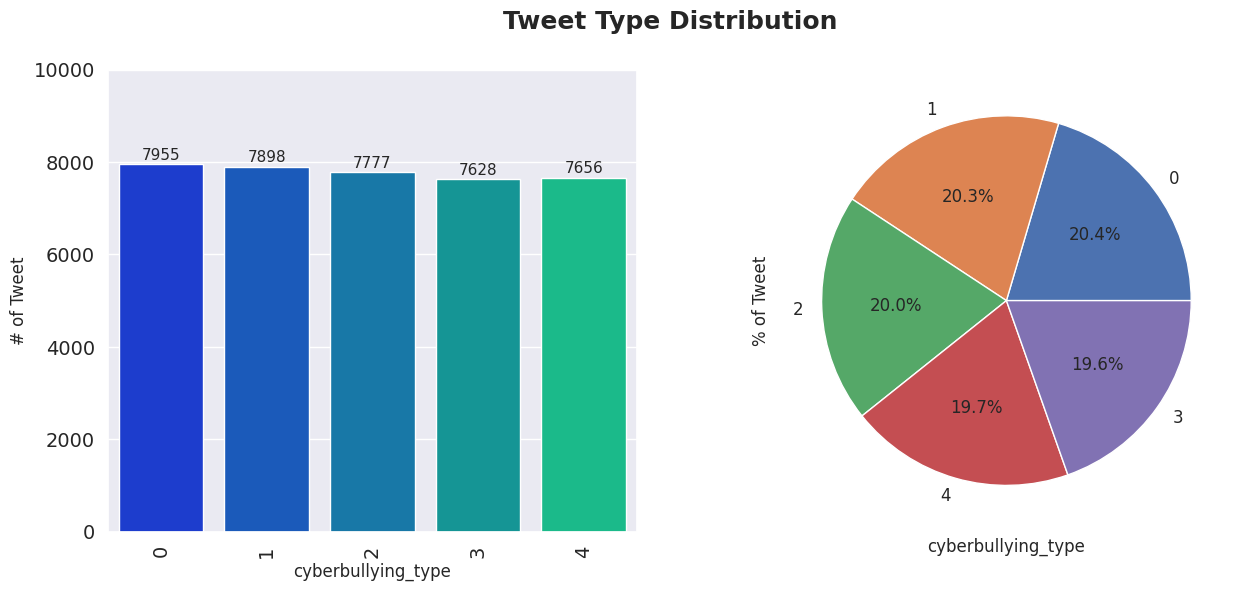

In [ ]:
# Membuat visualisasi Distribusi Tweet
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='sentiment', data=data, palette="winter", ax=ax[0])
ax[0].set_xlabel("cyberbullying_type", fontsize= 12)
ax[0].set_ylabel("# of Tweet", fontsize= 12)
fig.suptitle('Tweet Type Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,10000)
ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("cyberbullying_type", fontsize= 12)
plt.ylabel("# of Tweet", fontsize= 12)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+205), ha='center', va='center',fontsize = 11) 

data['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Tweet", fontsize= 12)
plt.show()

In [ ]:
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [ ]:
data['no_links_text'] = [remove_urls(i) for i in data['text']]

In [ ]:
def get_top_text(stop = 'english', ngram = (1,1), class_type = 'religion', top_n = 25):
    # Khởi tạo CountVectorizer
    cv = CountVectorizer(stop_words='english',ngram_range = ngram)
    data['no_links_text'] = [remove_urls(i) for i in data['text']]
    subset = data[data['sentiment']==class_type]
    cv.fit(subset['no_links_text'])
    cv_text = cv.transform(subset['no_links_text'])
    new_cv = pd.DataFrame(cv_text.todense(),columns=cv.get_feature_names_out())
    top_text = pd.DataFrame(new_cv.sum().T).sort_values(by=0, ascending=False).head(top_n)
    top_text.rename(columns={0:'Count'},inplace=True)
    return top_text

In [ ]:
religion_10 = get_top_text('english',(1,1),'religion',10)
gender_10 = get_top_text('english',(1,1),'gender',10)
age_10 = get_top_text('english',(1,1),'age',10)
ethnicity_10 = get_top_text('english',(1,1),'ethnicity',10)
other_10 = get_top_text('english',(1,1),'other_cyberbullying',10)

Single Word Visual

Text(0.5, 0.98, 'Top 10 Words by Cyberbullying Classification')

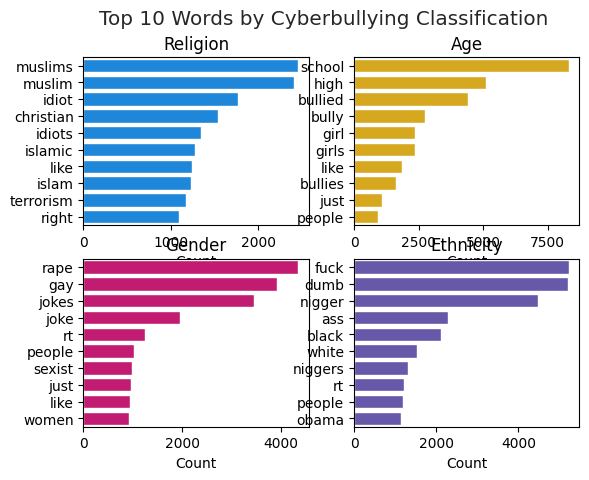

Text(0.5, 0.98, 'Top 10 Words by Cyberbullying Classification')

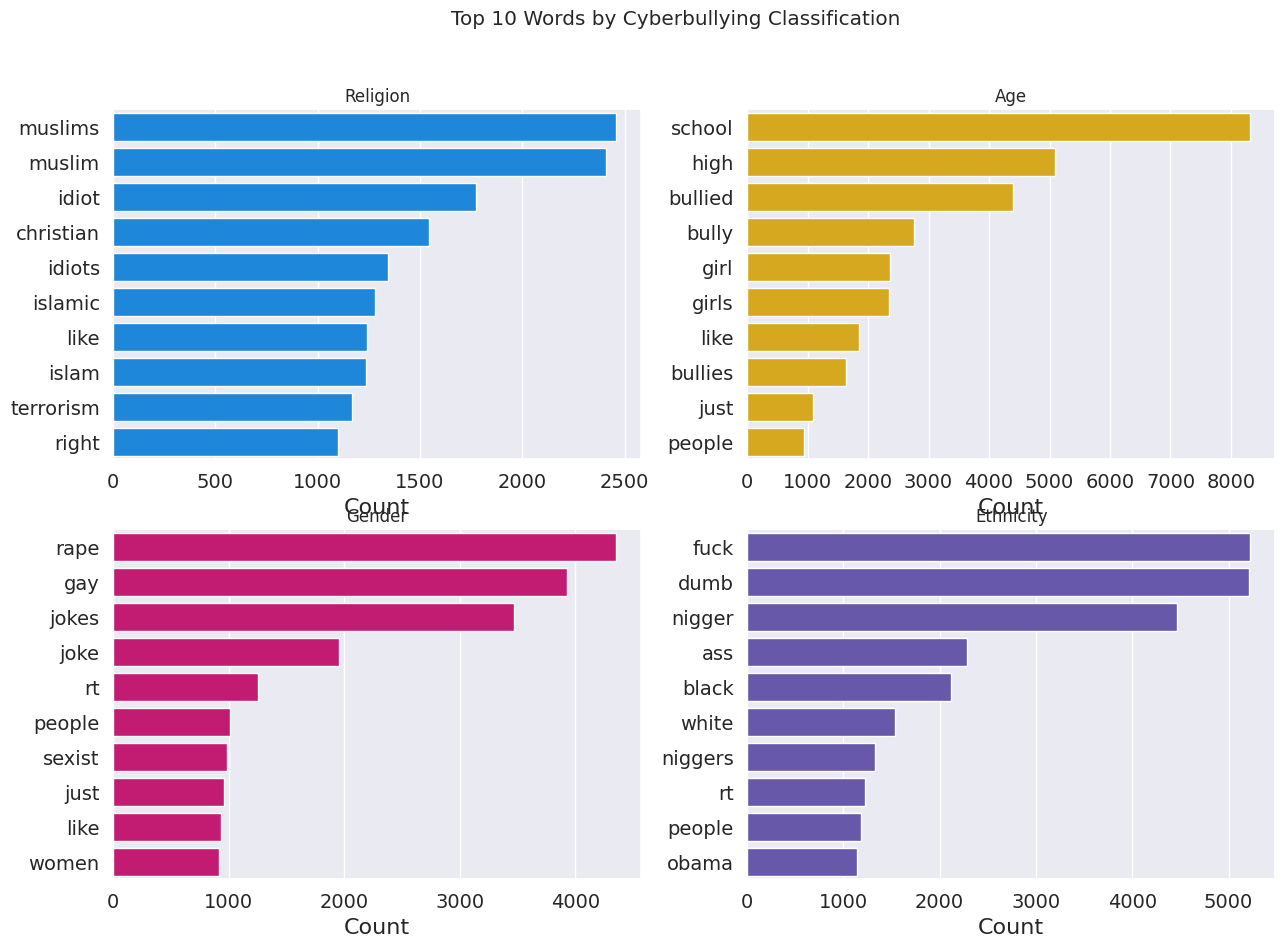

In [ ]:
fig, axes = plt.subplots(2, 2)

color = '#E75A7C'

sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,10)})

(sns.barplot(x="Count",  
            y= "Bigram", 
            color='#008BF8',
            ax=axes[0][0],
            data=religion_10.reset_index().rename(columns={"index":"Bigram"}))
 .set(ylabel=None, title="Religion")
)

(sns.barplot(x="Count",  
            y= "Bigram", 
            color='#DC0073',
            ax=axes[1][0],
            data=gender_10.reset_index().rename(columns={"index":"Bigram"}))
 .set(ylabel=None, title="Gender")
)


(sns.barplot(x="Count",  
            y= "Bigram", 
            color='#F5B700',
            ax=axes[0][1],
            data=age_10.reset_index().rename(columns={"index":"Bigram"}))
 .set(ylabel=None, title="Age")
)


(sns.barplot(x="Count",  
            y= "Bigram", 
            color='#5F4BB6',
            ax=axes[1][1],
            data=ethnicity_10.reset_index().rename(columns={"index":"Bigram"}))
 .set(ylabel=None, title="Ethnicity")
)

fig.suptitle("Top 10 Words by Cyberbullying Classification")

Bigram Visual

In [ ]:
religion_bi_10 = get_top_text('english',(2,2),'religion',10)
gender_bi_10 = get_top_text('english',(2,2),'gender',10)
age_bi_10 = get_top_text('english',(2,2),'age',10)
ethnicity_bi_10 = get_top_text('english',(2,2),'ethnicity',10)
other_bi_10 = get_top_text('english',(2,2),'other_cyberbullying',10)

Text(0.5, 0.98, 'Top 10 Bigrams by Cyberbullying Classification')

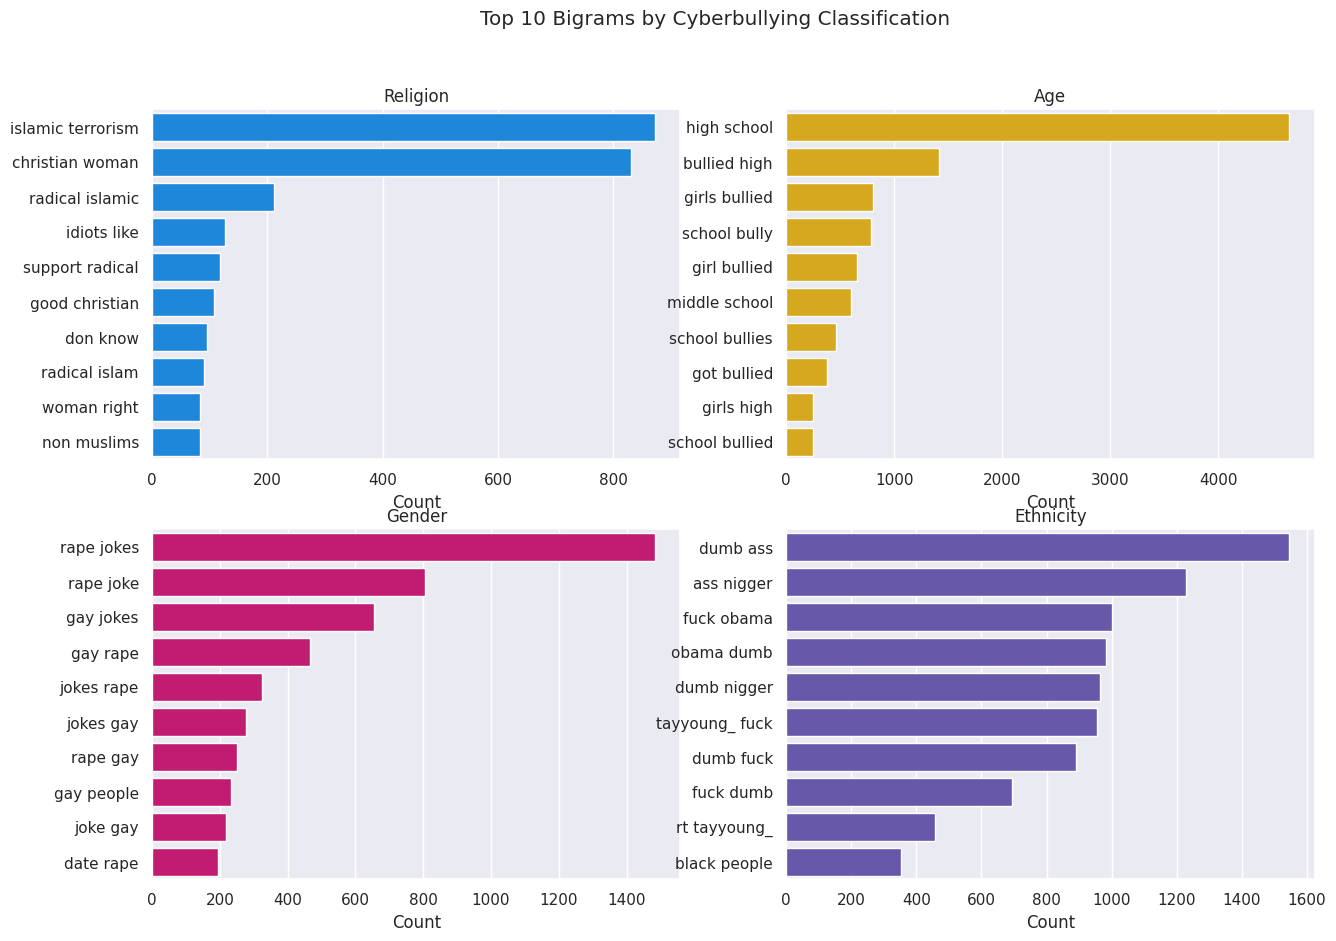

Text(0.5, 0.98, 'Top 10 Bigrams by Cyberbullying Classification')

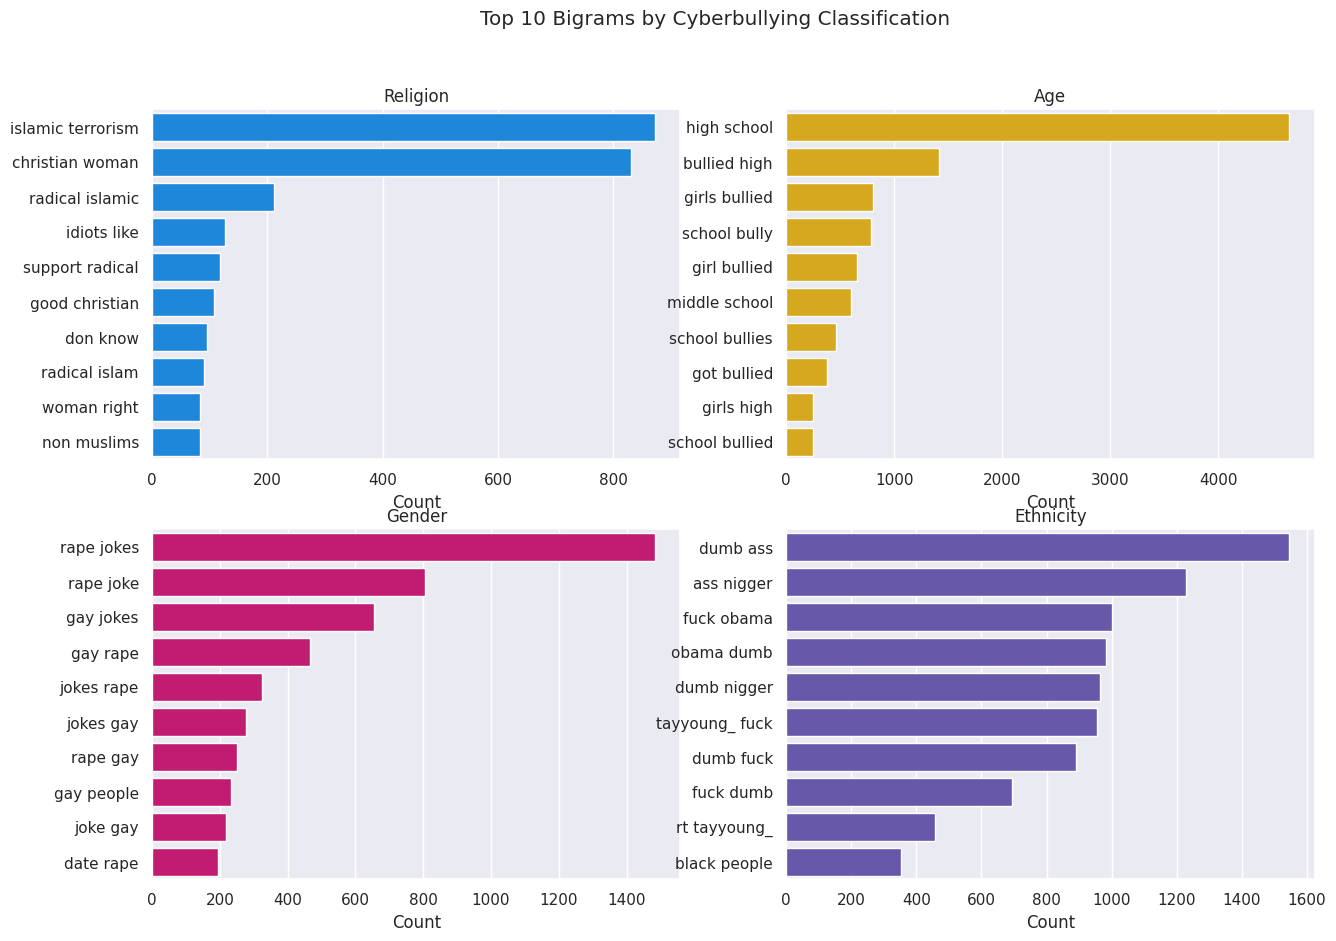

In [ ]:
fig, axes = plt.subplots(2, 2)

color = '#E75A7C'

sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,10)})

(sns.barplot(x="Count",  
            y= "Bigram", 
            color='#008BF8',
            ax=axes[0][0],
            data=religion_bi_10.reset_index().rename(columns={"index":"Bigram"}))
 .set(ylabel=None, title="Religion")
)

(sns.barplot(x="Count",  
            y= "Bigram", 
            color='#DC0073',
            ax=axes[1][0],
            data=gender_bi_10.reset_index().rename(columns={"index":"Bigram"}))
 .set(ylabel=None, title="Gender")
)


(sns.barplot(x="Count",  
            y= "Bigram", 
            color='#F5B700',
            ax=axes[0][1],
            data=age_bi_10.reset_index().rename(columns={"index":"Bigram"}))
 .set(ylabel=None, title="Age")
)


(sns.barplot(x="Count",  
            y= "Bigram", 
            color='#5F4BB6',
            ax=axes[1][1],
            data=ethnicity_bi_10.reset_index().rename(columns={"index":"Bigram"}))
 .set(ylabel=None, title="Ethnicity")
)

fig.suptitle("Top 10 Bigrams by Cyberbullying Classification")

In [ ]:
data.head()

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  
0  In other words #katandandre, your food was cra...  
1  Why is #aussietv so white? #MKR #theblock #ImA...  
2  @XochitlSuckkks a classy whore? Or more red ve...  
3  @Jason_Gio meh. :P  thanks for the heads up, b...  
4  @RudhoeEnglish This is an ISIS account pretend...

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  
0  In other words #katandandre, your food was cra...  
1  Why is #aussietv so white? #MKR #theblock #ImA...  
2  @XochitlSuckkks a classy whore? Or more red ve...  
3  @Jason_Gio meh. :P  thanks for the heads up, b...  
4  @RudhoeEnglish This is an ISIS account pretend...

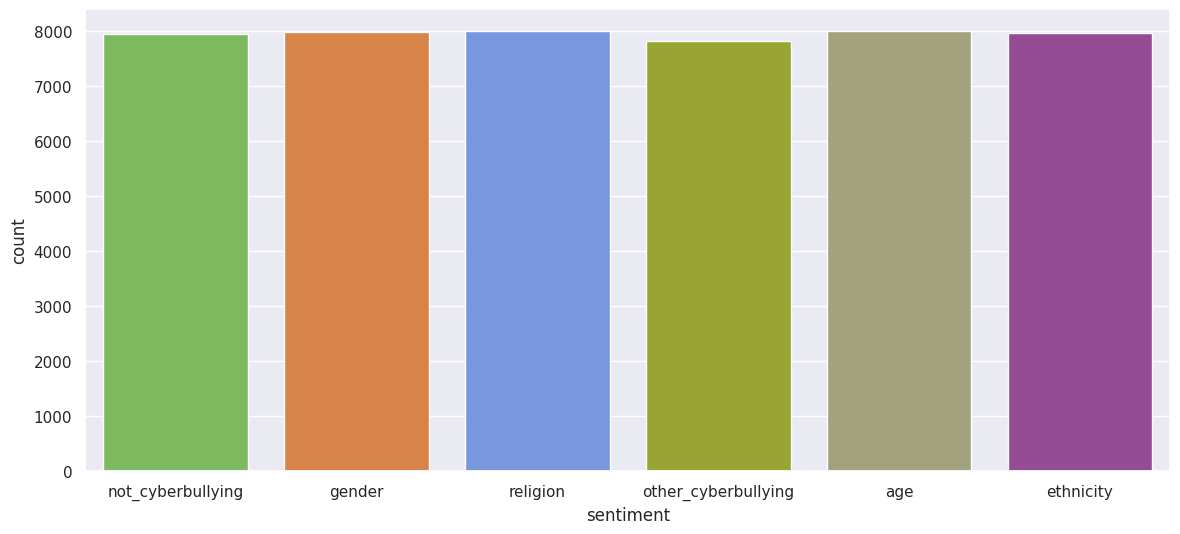

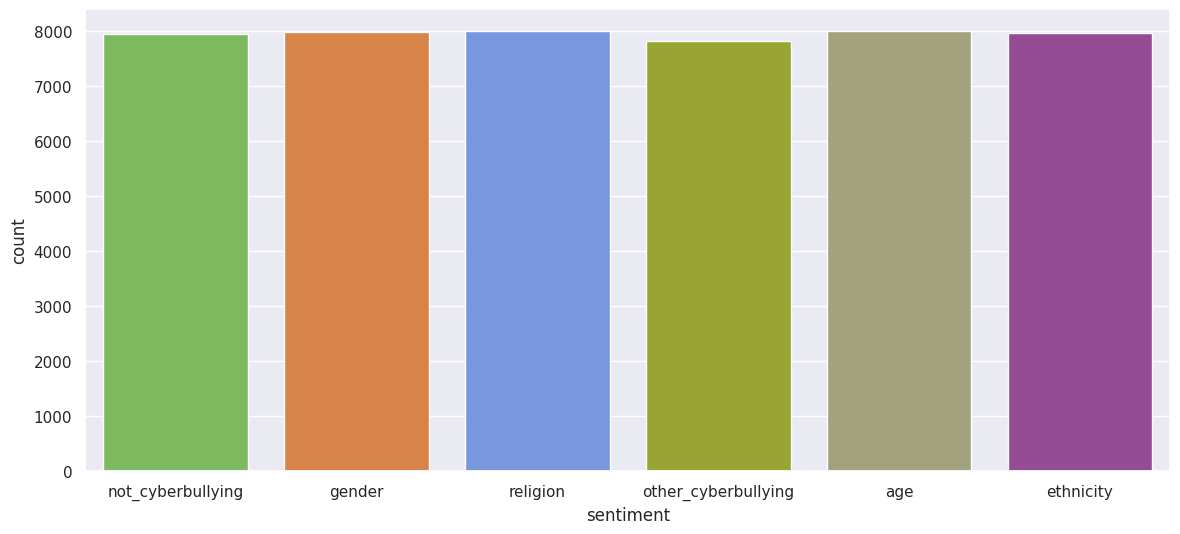

In [ ]:
colors_palet = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
]
                   
plt.figure(figsize=(14,6))
sns.countplot(x='sentiment', data=data, palette=colors_palet)
plt.show()

## Tiến hành tiền xử lý

In [ ]:
data["sentiment_encoded"] = data['sentiment'].replace({"religion": 1, "age": 2, "ethnicity": 3, "gender": 4, "other_cyberbullying": 5,"not_cyberbullying": 6})

In [ ]:
stop_words = set(stopwords.words('english'))

### kiểm tra missing values

In [ ]:
data.isnull().sum()

text                 0
sentiment            0
no_links_text        0
sentiment_encoded    0
dtype: int64

text                 0
sentiment            0
no_links_text        0
sentiment_encoded    0
dtype: int64

Sau khi kiểm tra không có giá trị nào missing!

### Xác định một số chức năng để loại bỏ dữ liệu không mong muốn

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=8a8cb229c2bf6a1c7877fbda38008e8a35828d35fc7076041a70fec7f5efdae0
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emoji

In [ ]:
def strip_emoji(text):
    return emoji.replace_emoji(text,replace="")

In [ ]:
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'(.)1+', r'1', text)
    text = re.sub('[0-9]+', '', text)
    stopchars= string.punctuation
    table = str.maketrans('', '', stopchars)
    text = text.translate(table)

    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

In [ ]:
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [ ]:
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

In [ ]:
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [ ]:
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

### Tokenization

In [ ]:
# Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

In [ ]:
#Lemmatization
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

### Tiền xử lý văn bản sử dụng các functions trên

In [ ]:
def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    return text

In [ ]:
data['cleaned_text'] = data['text'].apply(preprocess)
data['tweet_list'] = data['cleaned_text'].apply(word_tokenize)
data.head()

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  
0      [words, katandandre, food, crapilicious, mkr]  
1  [aussietv, white, mkr, theblock, imacelebritya...  
2             [classy, whore, red, velvet, cupcakes]  
3  [meh, p, thanks, heads, concerned, another, an...  
4  [isis, account, pretending, kurdish, account, ...

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  
0      [words, katandandre, food, crapilicious, mkr]  
1  [aussietv, white, mkr, theblock, imacelebritya...  
2             [classy, whore, red, velvet, cupcakes]  
3  [meh, p, thanks, heads, concerned, another, an...  
4  [isis, account, pretending, kurdish, account, ...

### Kiểm tra duplicate tweets sau quá trình làm sạch

In [ ]:
data["cleaned_text"].duplicated().sum()

2977

2977

In [ ]:
data.drop_duplicates('cleaned_text', inplace = True)

### Kiểm tra Class Balance sau khi làm sạch

In [ ]:
data.sentiment.value_counts()

religion               7955
age                    7898
ethnicity              7777
not_cyberbullying      7657
gender                 7628
other_cyberbullying    5800
Name: sentiment, dtype: int64

religion               7955
age                    7898
ethnicity              7777
not_cyberbullying      7657
gender                 7628
other_cyberbullying    5800
Name: sentiment, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44715 entries, 0 to 47691
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               44715 non-null  object
 1   sentiment          44715 non-null  object
 2   no_links_text      44715 non-null  object
 3   sentiment_encoded  44715 non-null  int64 
 4   cleaned_text       44715 non-null  object
 5   tweet_list         44715 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44715 entries, 0 to 47691
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               44715 non-null  object
 1   sentiment          44715 non-null  object
 2   no_links_text      44715 non-null  object
 3   sentiment_encoded  44715 non-null  int64 
 4   cleaned_text       44715 non-null  object
 5   tweet_list         44715

## Kiểm tra độ dài của các texts tweet

In [ ]:
text_len = []
for text in data.tweet_list:
    tweet_len = len(text)
    text_len.append(tweet_len)
data['text_len'] = text_len
data.head()

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  text_len  
0      [words, katandandre, food, crapilicious, mkr]         5  
1  [aussietv, white, mkr, theblock, imacelebritya...        11  
2             [classy, whore, red, velvet, cupcakes]         5  
3  [meh, p, thanks, heads, concerned, another, an...         9  
4  [isis, account, pretending, kurdish, account, ...         8

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  text_len  
0      [words, katandandre, food, crapilicious, mkr]         5  
1  [aussietv, white, mkr, theblock, imacelebritya...        11  
2             [classy, whore, red, velvet, cupcakes]         5  
3  [meh, p, thanks, heads, concerned, another, an...         9  
4  [isis, account, pretending, kurdish, account, ...         8

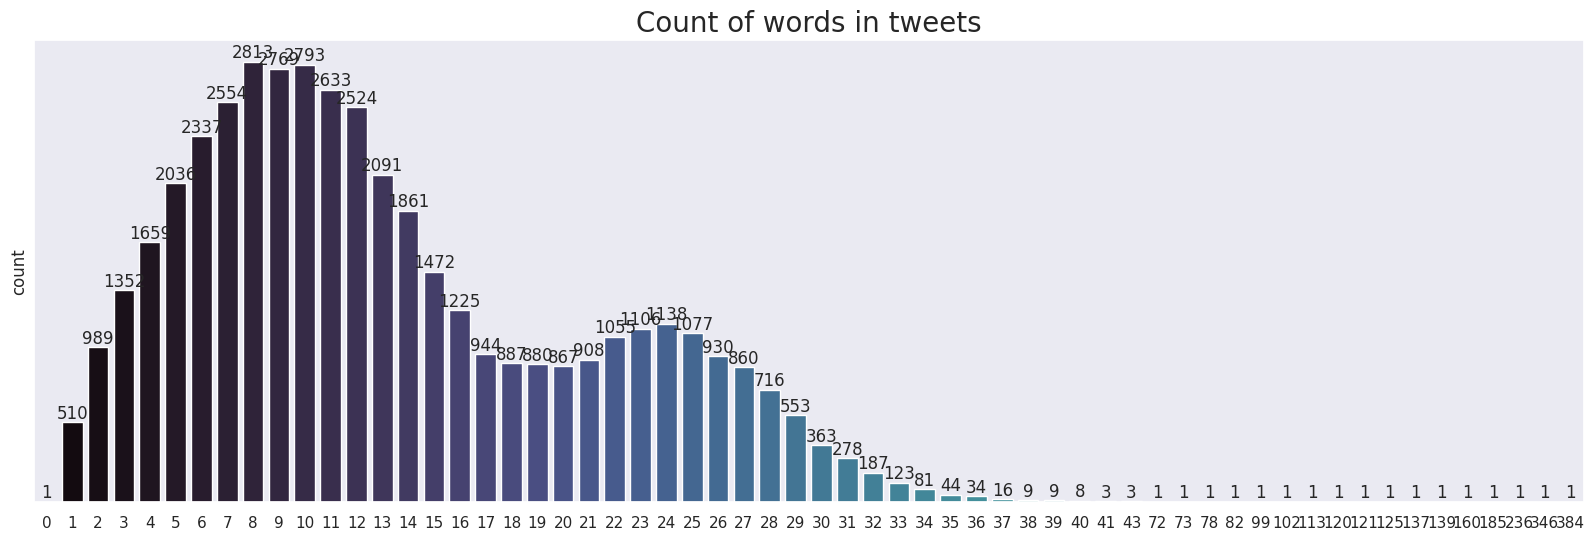

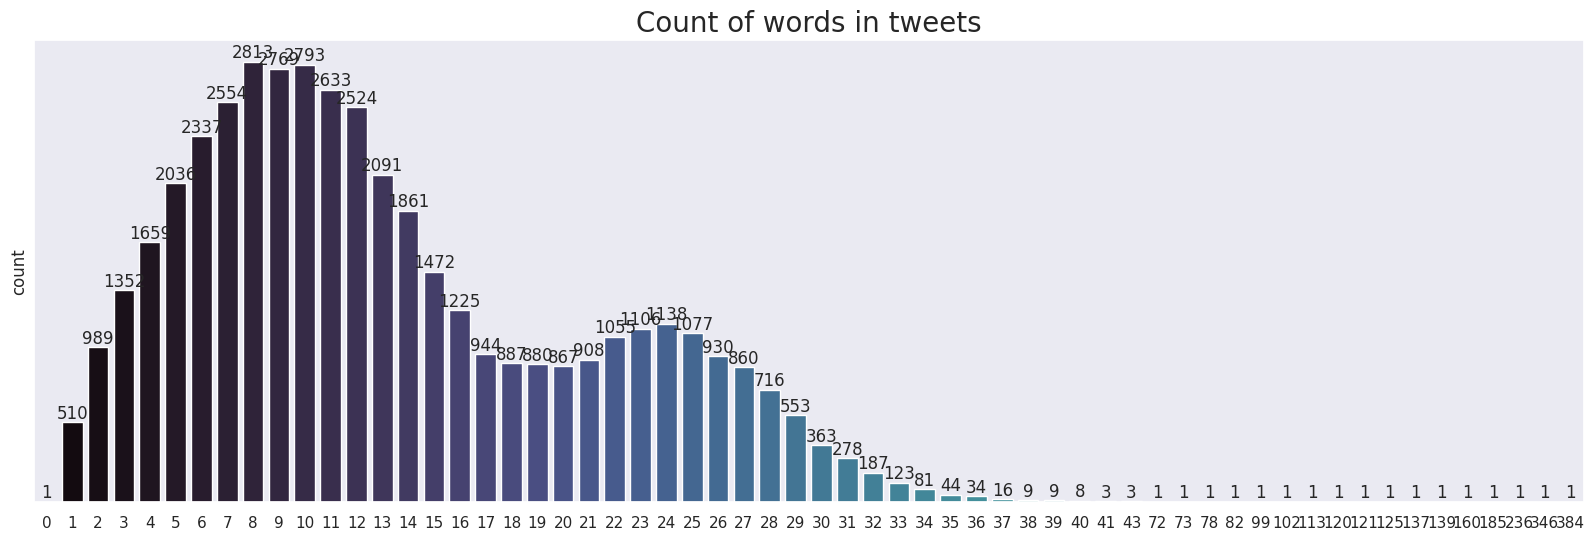

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='text_len', data=data, palette='mako')
plt.title('Count of words in tweets', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

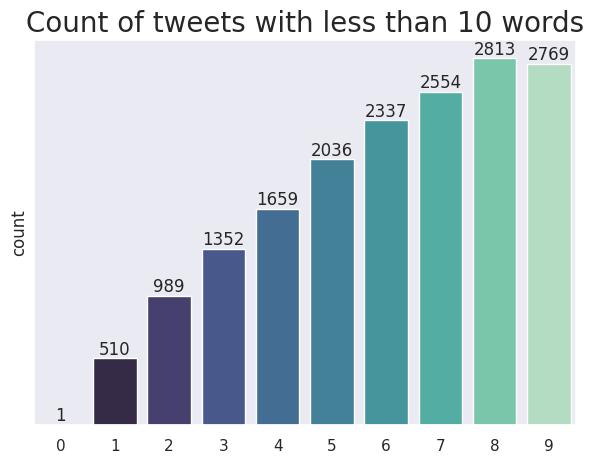

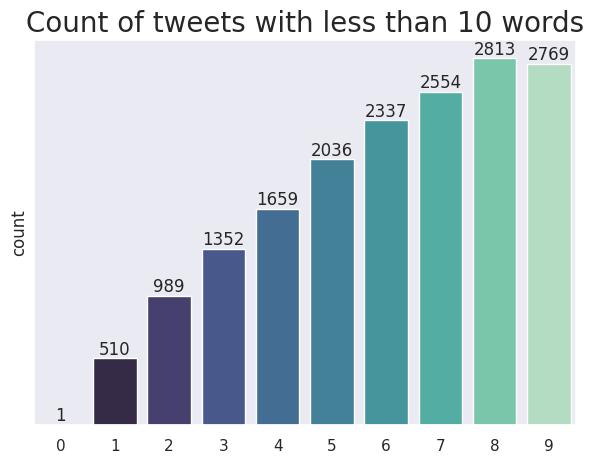

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=data[data['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
# Xóa các tweets quá dài hơn 100 từ
#data = data[(data['text_len'] <= 100) & (data['text_len'] > 0)]

In [ ]:
max_length = np.max(data['text_len'])
print("Maximum length of tweet = ",max_length)

Maximum length of tweet =  384
Maximum length of tweet =  384


## Removing text without words

In [ ]:
data = data[data['text_len']!=0]

In [ ]:
data.shape

(44714, 7)

(44714, 7)

In [ ]:
# For stemming and lemmatization
stem_tweets = []
lemma_tweets = []
lemma_stem_tweets = [];

# For stemming and lemmatization
for text in data['cleaned_text']:
  stem_tweets.append(stemmer(text));      # Stemming
  lemma_tweets.append(lemmatize(text));    # Lemmatize

# For lemmatization followed by stemming
for text in lemma_tweets:
  lemma_stem_tweets.append(stemmer(text));

In [ ]:
data['Stemming'] = stem_tweets;
data['Lemmatization'] = lemma_tweets;
data['Lemma_Stemming'] = lemma_stem_tweets;
data.head()

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  text_len  \
0      [words, katandandre, food, crapilicious, mkr]         5   
1  [aussietv, white, mkr, theblock, imacelebritya...        11   
2             [classy, whore, red, velvet, cupcakes]         5   
3  [meh, p, thanks, heads, concerned, another, an...         9   
4  [isis, account, pretending, kurdish, account, ...         8   

                                            Stemming  \
0                 word katandandr food crapilici mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                     classi whore red velvet cupcak   
3  meh p thank head concern anoth angri dude twitter   
4  isi account pretend kurdish account like islam...   

                                       Lemmatization  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head concerned another angry dude...   
4  isi account pretending kurdish account like is...   

                                      Lemma_Stemming  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3  meh p thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  text_len  \
0      [words, katandandre, food, crapilicious, mkr]         5   
1  [aussietv, white, mkr, theblock, imacelebritya...        11   
2             [classy, whore, red, velvet, cupcakes]         5   
3  [meh, p, thanks, heads, concerned, another, an...         9   
4  [isis, account, pretending, kurdish, account, ...         8   

                                            Stemming  \
0                 word katandandr food crapilici mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                     classi whore red velvet cupcak   
3  meh p thank head concern anoth angri dude twitter   
4  isi account pretend kurdish account like islam...   

                                       Lemmatization  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head concerned another angry dude...   
4  isi account pretending kurdish account like is...   

                                      Lemma_Stemming  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3  meh p thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...

## WordCloud

In [ ]:
not_cyberbullying_type = data[data['sentiment']=='not_cyberbullying']
gender_type = data[data['sentiment']=='gender']
religion_type = data[data['sentiment']=='religion']
other_cyberbullying_type = data[data['sentiment']=='other_cyberbullying']
age_type = data[data['sentiment']=='age']
ethnicity_type = data[data['sentiment']=='ethnicity']

In [ ]:
def plot_wordcloud(cyberbullying_type):
    string = ""
    for i in data[data.sentiment == cyberbullying_type].cleaned_text.values:
        string = string + " " + i.strip()

    custom_mask = np.array(Image.open("./twiiter.png"))
    mask_colors = ImageColorGenerator(custom_mask)
    wordcloud = WordCloud(background_color ='white',max_words=2000, max_font_size=256,
               random_state=42, width=custom_mask.shape[1],height=custom_mask.shape[0],
                mask = custom_mask,min_font_size = 10,color_func=mask_colors).generate(string)
              # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cyberbullying_type)
    plt.show()
    del string 

In [ ]:
not_cyberbullying_type = data[data['sentiment']=='not_cyberbullying']
gender_type = data[data['sentiment']=='gender']
religion_type = data[data['sentiment']=='religion']
other_cyberbullying_type = data[data['sentiment']=='other_cyberbullying']
age_type = data[data['sentiment']=='age']
ethnicity_type = data[data['sentiment']=='ethnicity']

### Gender dựa trên Cyberbullying

In [ ]:
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top20_gender = pd.DataFrame(gender.most_common(20))
top20_gender.columns = ['Top Words','Count']
top20_gender.style.background_gradient(cmap='Greens')

Text(0.5, 1.0, 'Top 20 words in Gender Cyberbullying')

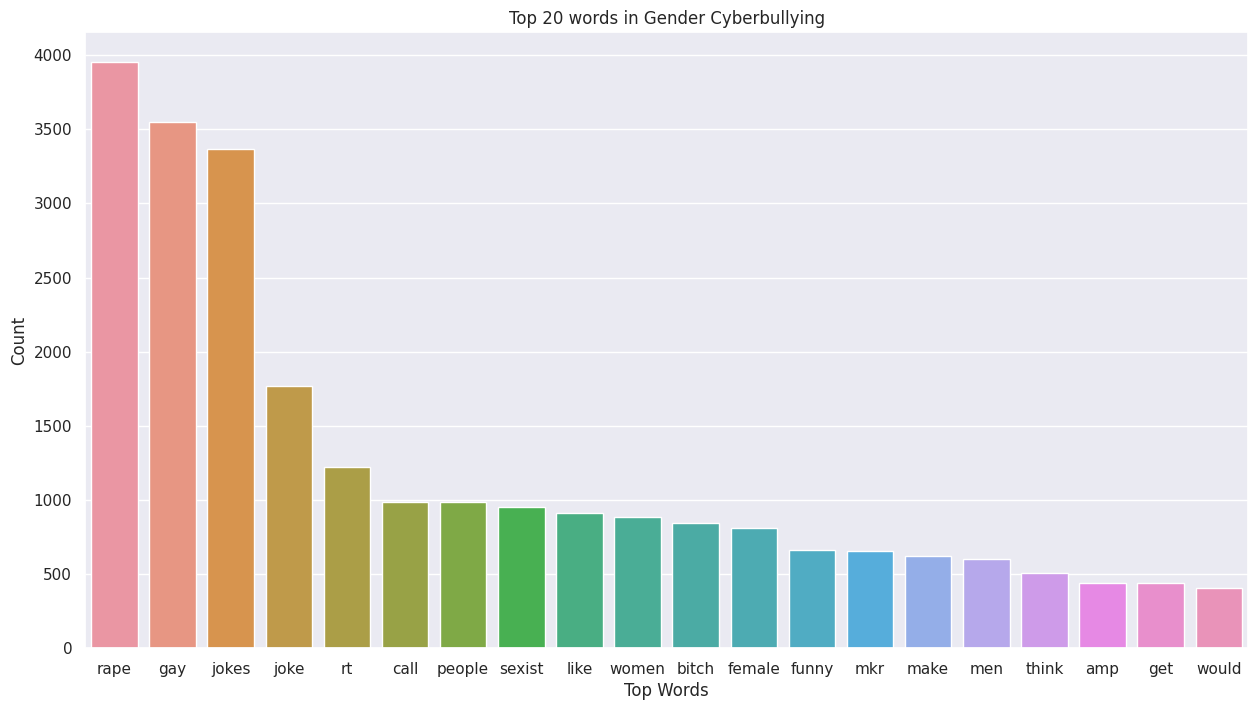

Text(0.5, 1.0, 'Top 20 words in Gender Cyberbullying')

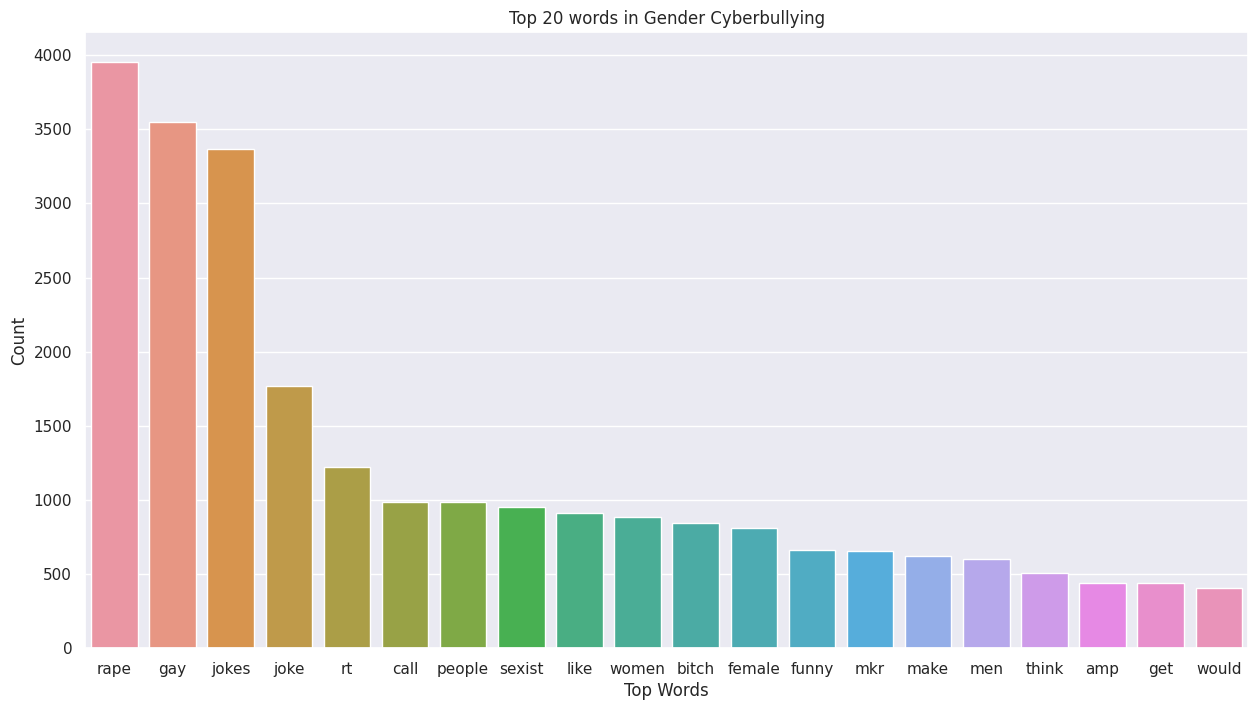

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_gender, y="Count", x="Top Words")
plt.title("Top 20 words in Gender Cyberbullying")

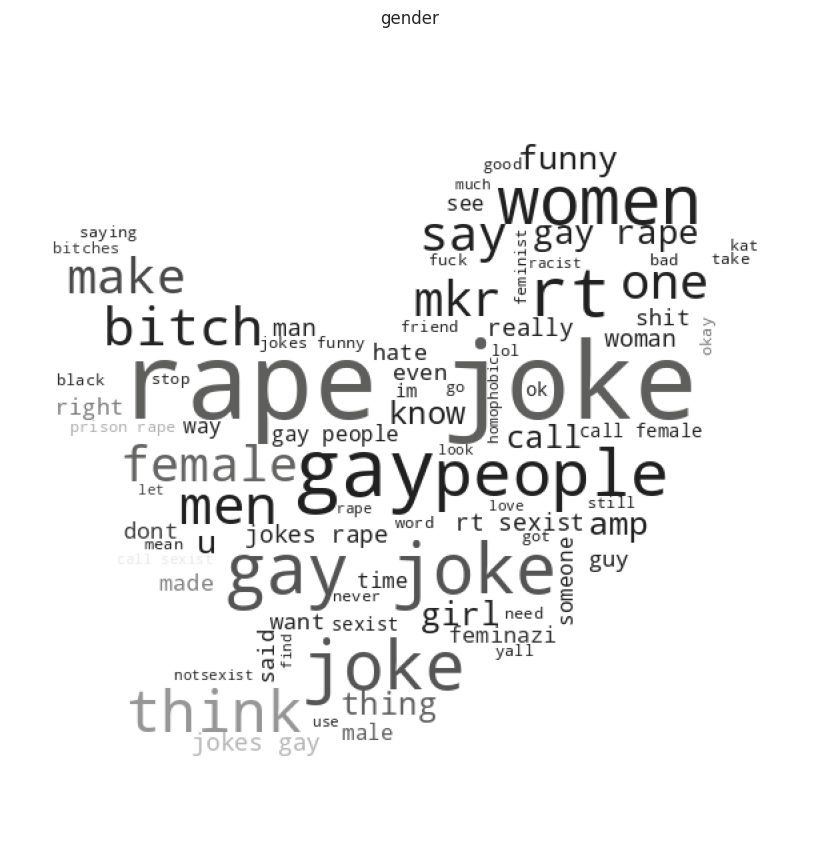

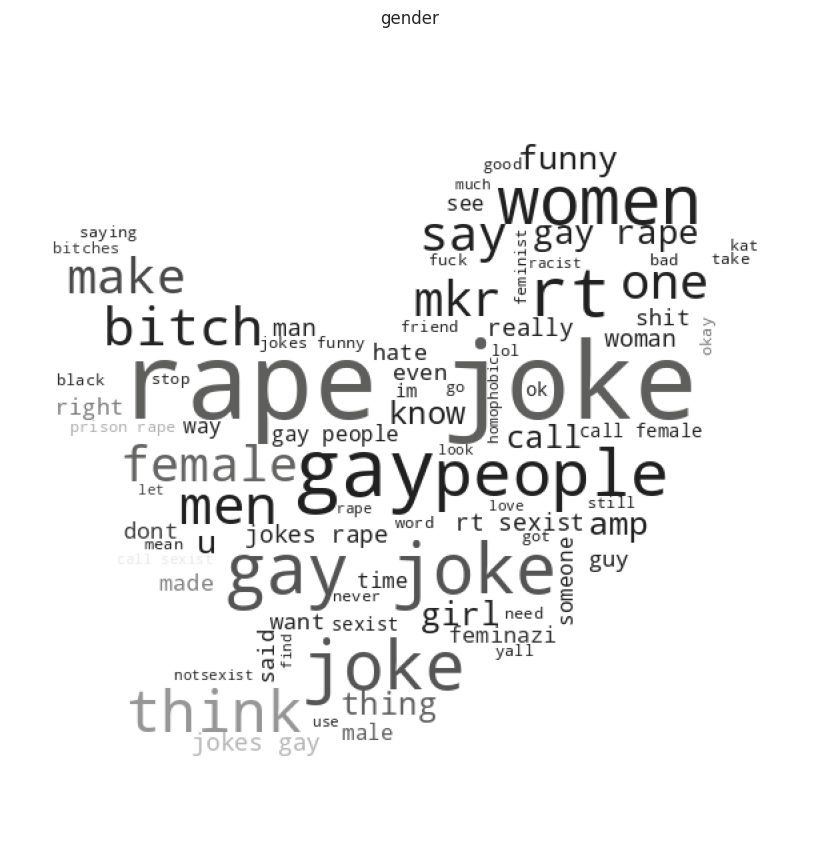

In [ ]:
plot_wordcloud('gender')

### Religion Dựa trên Cyberbullying

In [ ]:
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
top20_religion = pd.DataFrame(religion.most_common(20))
top20_religion.columns = ['Top Words','Count']
top20_religion.style.background_gradient(cmap='Greens')

Text(0.5, 1.0, 'Top 20 words in Religion Cyberbullying')

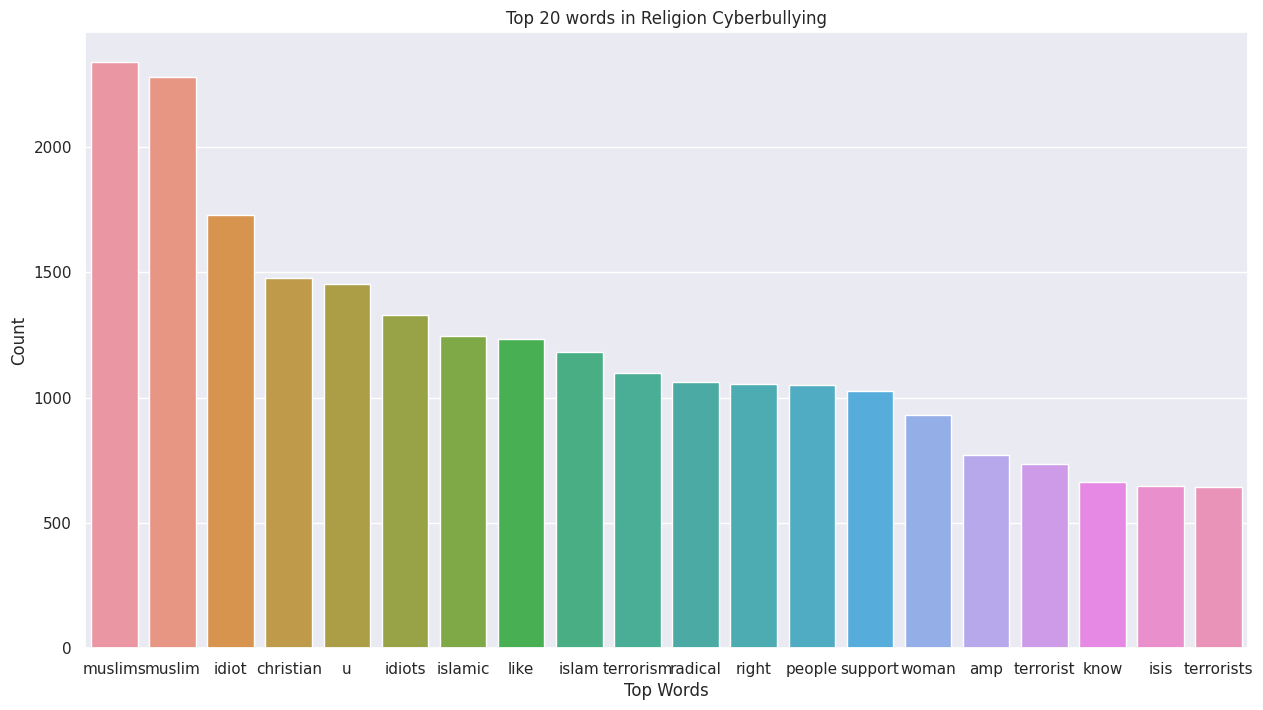

Text(0.5, 1.0, 'Top 20 words in Religion Cyberbullying')

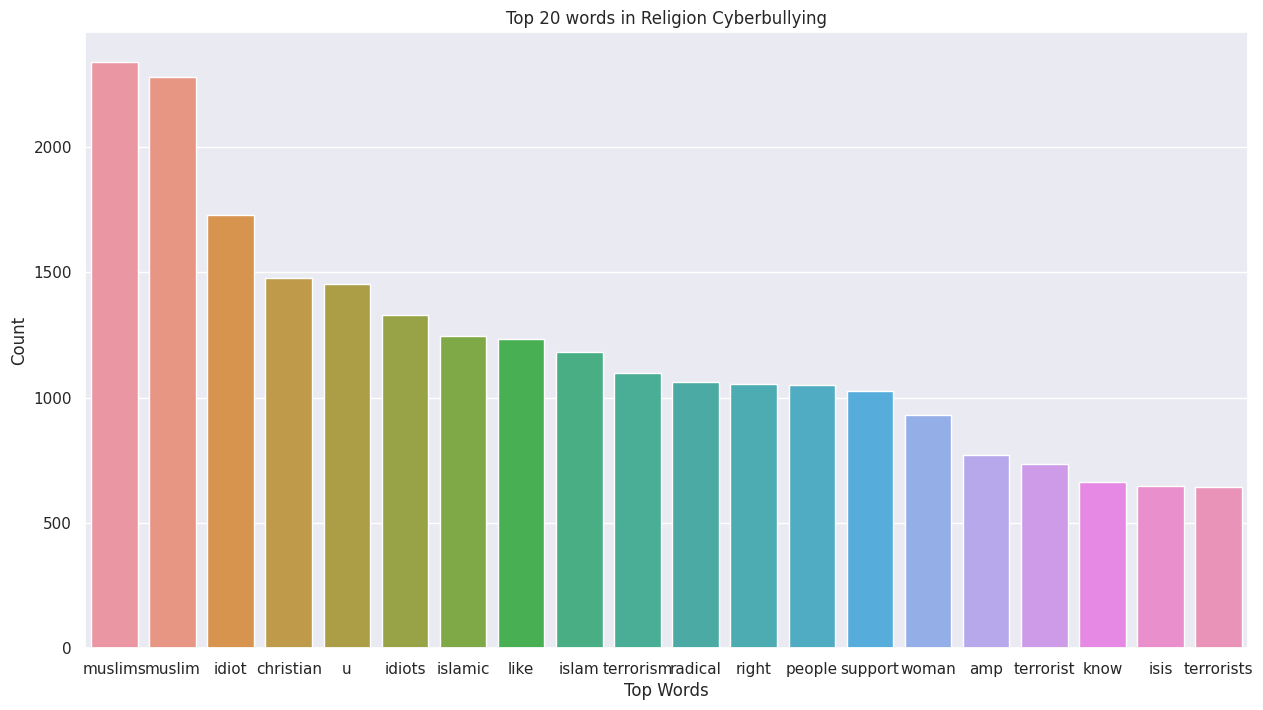

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_religion, y="Count", x="Top Words")
plt.title("Top 20 words in Religion Cyberbullying")

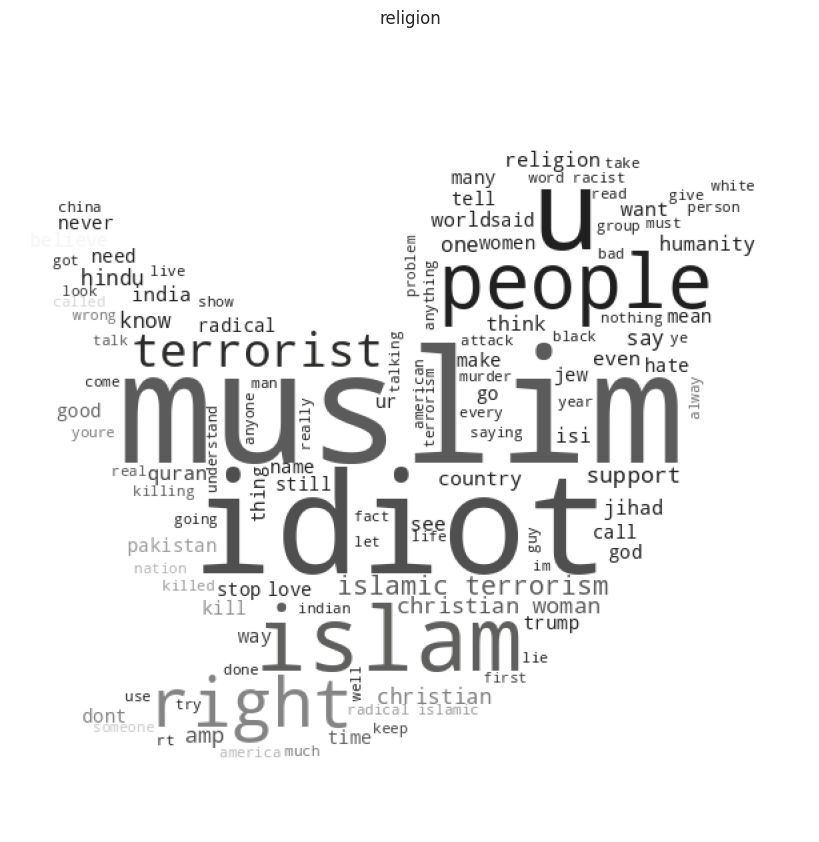

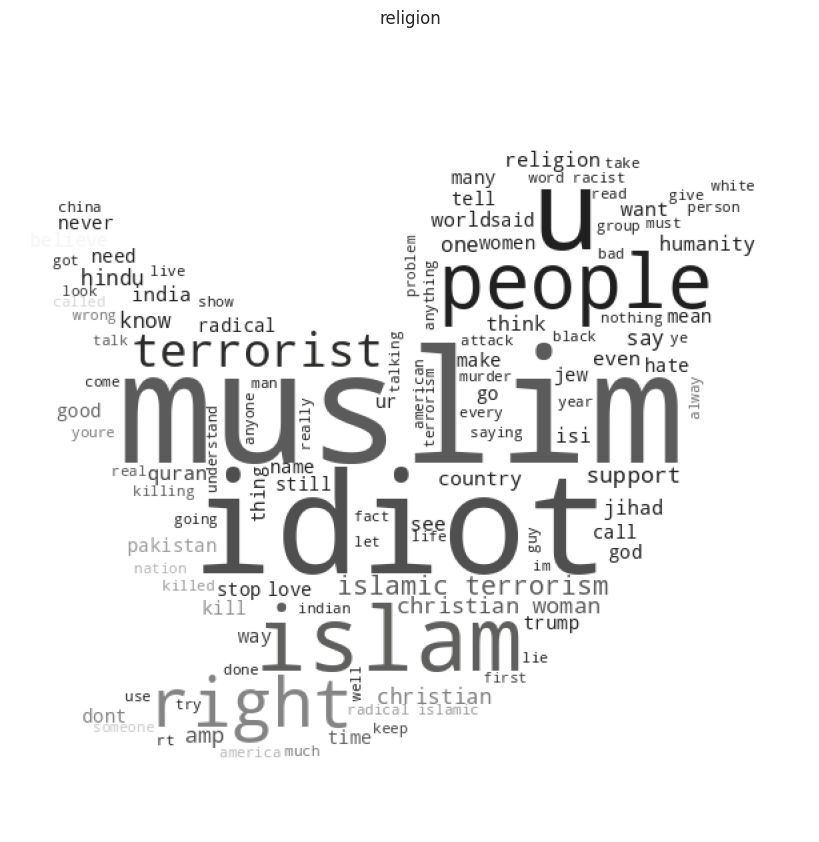

In [ ]:
plot_wordcloud('religion')

### Age dựa trên Cyberbullying

In [ ]:
age = Counter([item for sublist in age_type['tweet_list'] for item in sublist])
top20_age = pd.DataFrame(age.most_common(20))
top20_age.columns = ['Top Words','Count']
top20_age.style.background_gradient(cmap='Greens')

Text(0.5, 1.0, 'Top 20 words in Age Cyberbullying')

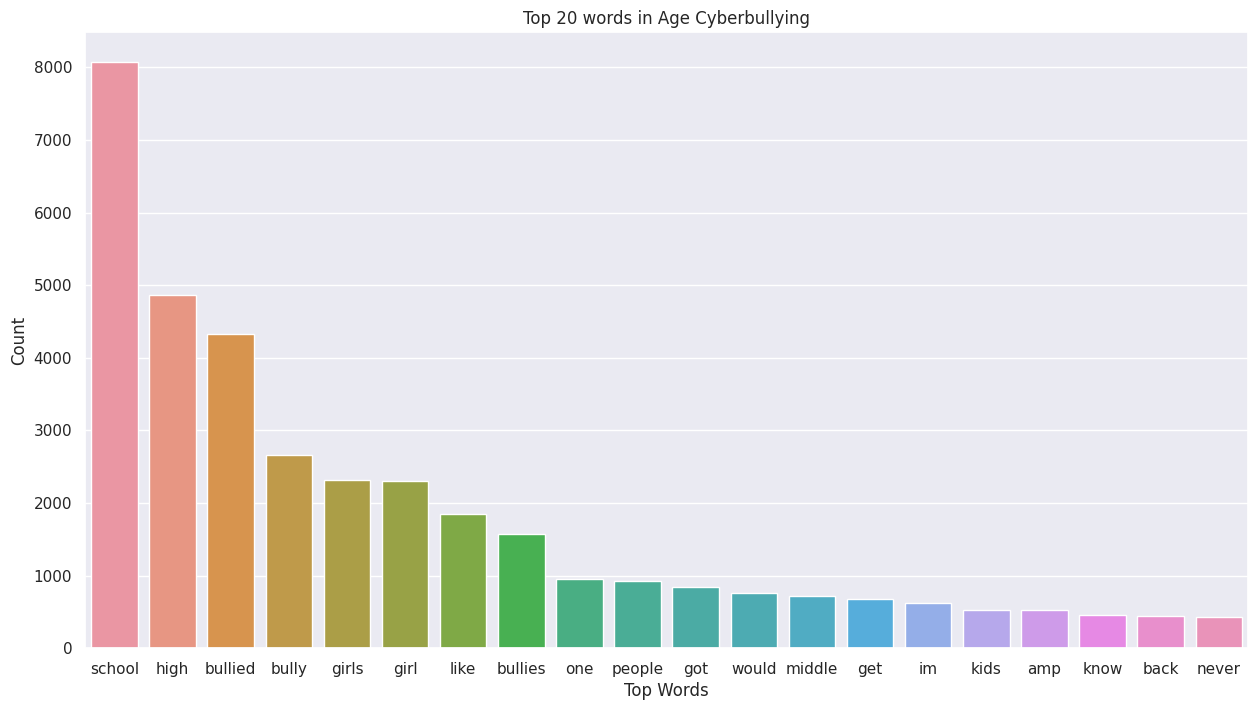

Text(0.5, 1.0, 'Top 20 words in Age Cyberbullying')

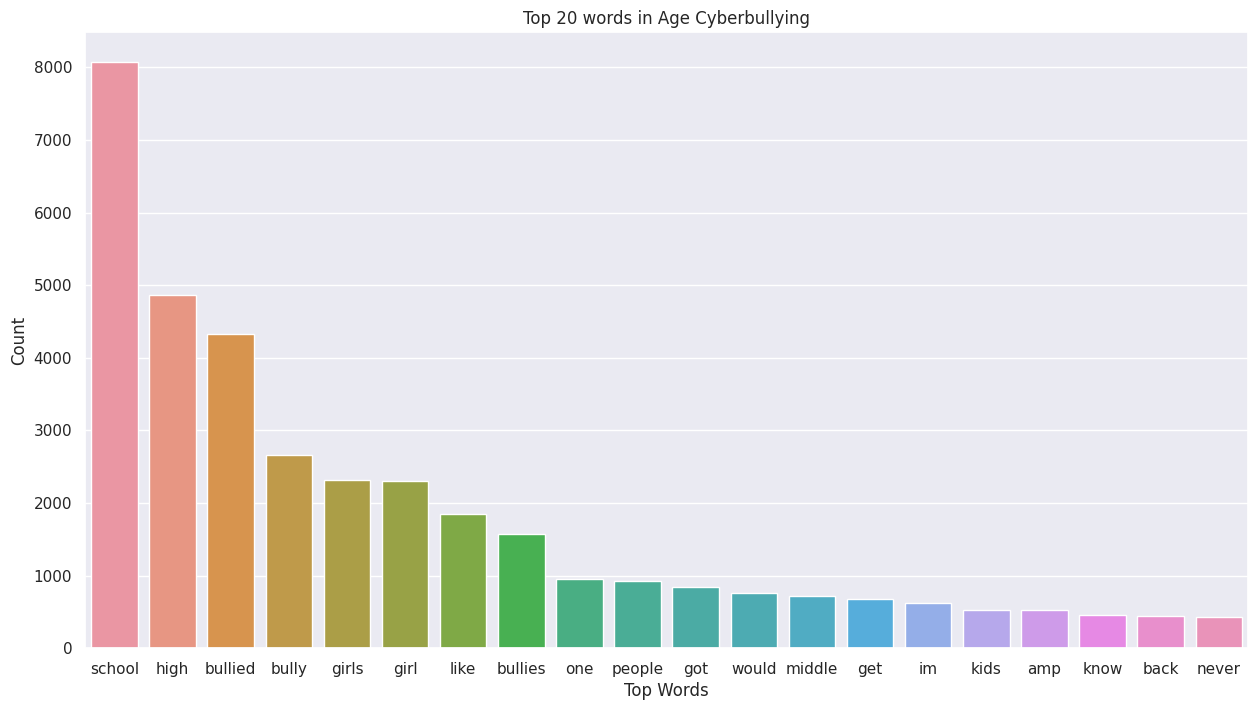

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_age, y="Count", x="Top Words")
plt.title("Top 20 words in Age Cyberbullying")

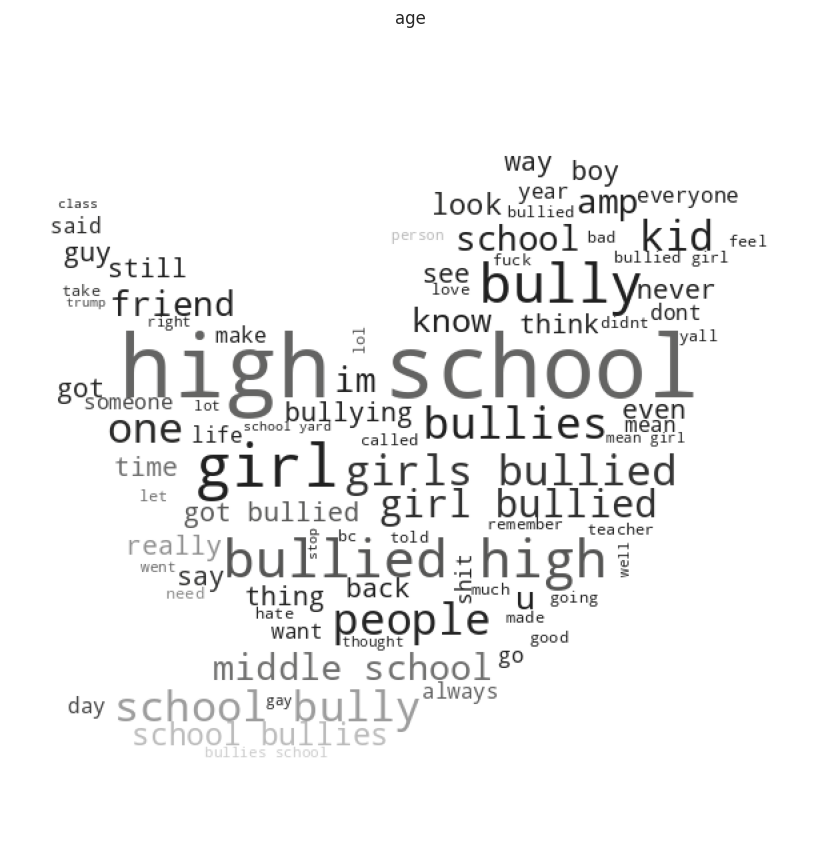

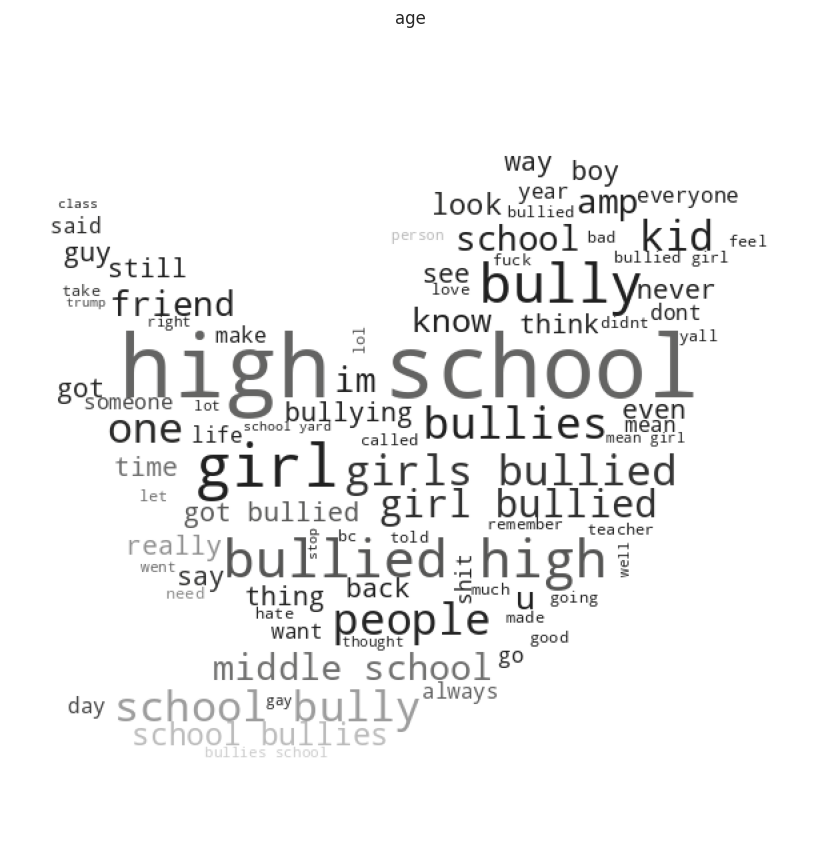

In [ ]:
plot_wordcloud('age')

### Ethnicity dựa trên Cyberbullying

In [ ]:
ethnicity = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])
top20_ethnicity = pd.DataFrame(ethnicity.most_common(20))
top20_ethnicity.columns = ['Top Words','Count']
top20_ethnicity.style.background_gradient(cmap='Greens')

Text(0.5, 1.0, 'Top 20 words in Ethnicity Cyberbullying')

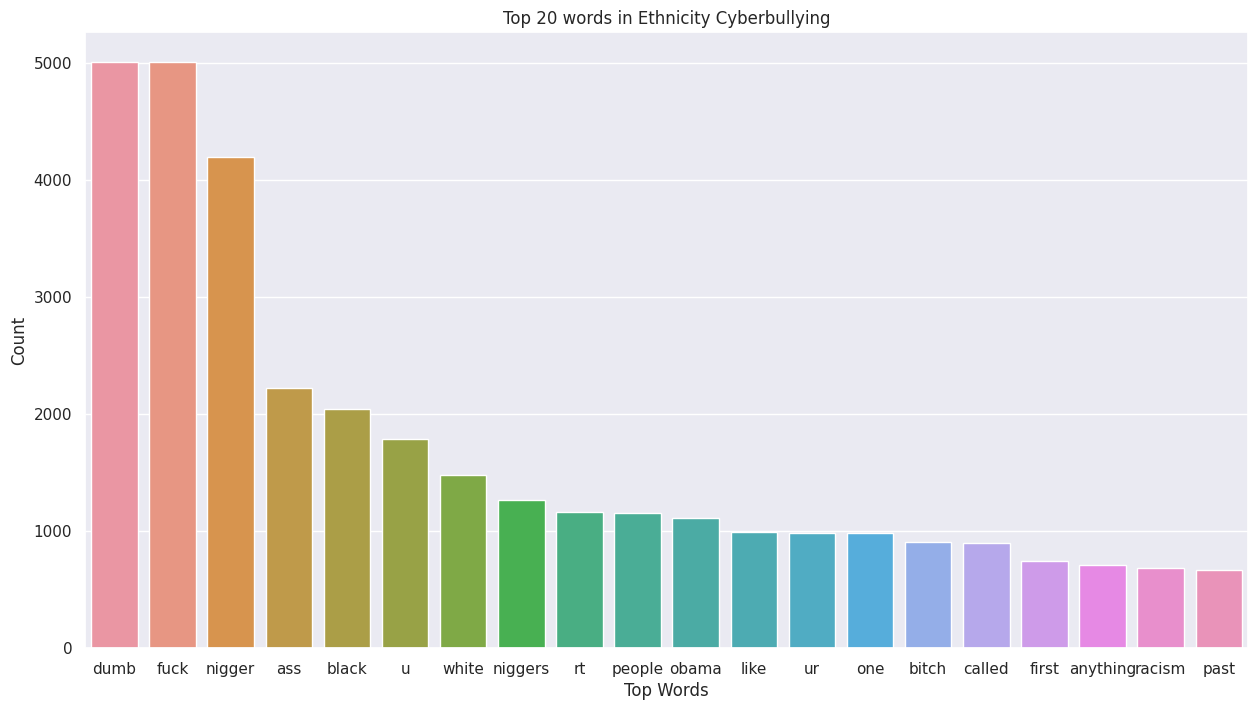

Text(0.5, 1.0, 'Top 20 words in Ethnicity Cyberbullying')

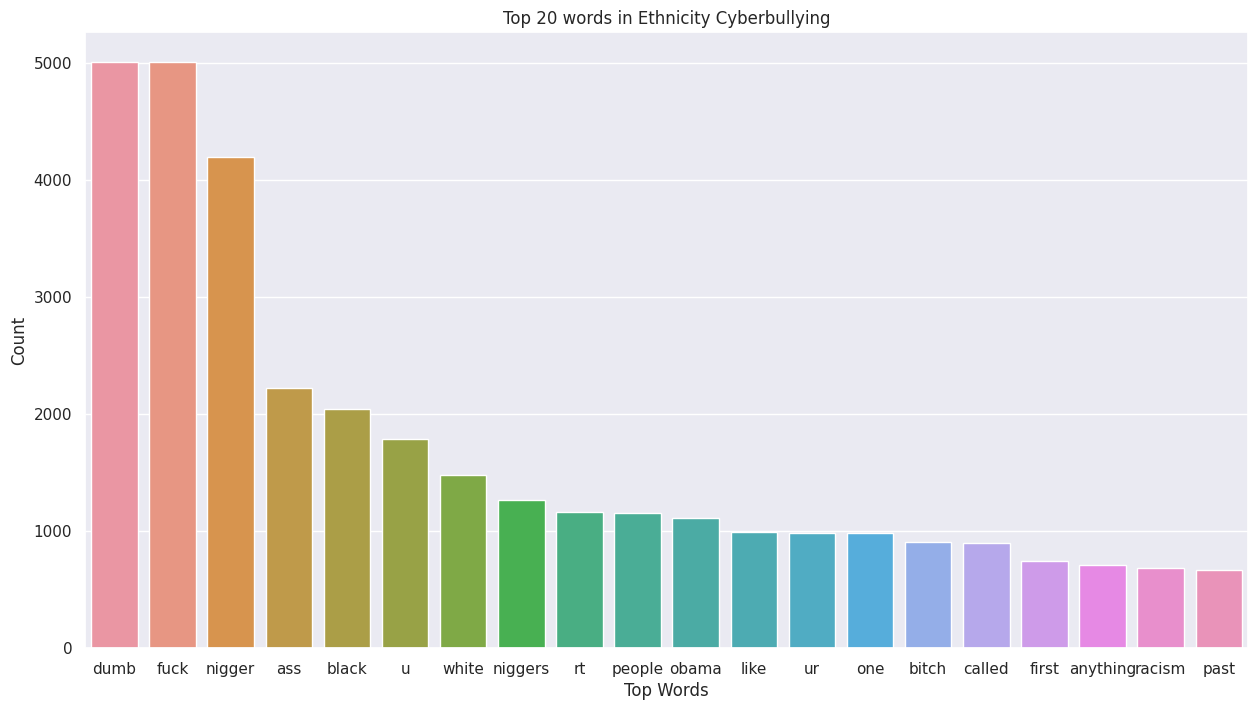

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_ethnicity, y="Count", x="Top Words")
plt.title("Top 20 words in Ethnicity Cyberbullying")

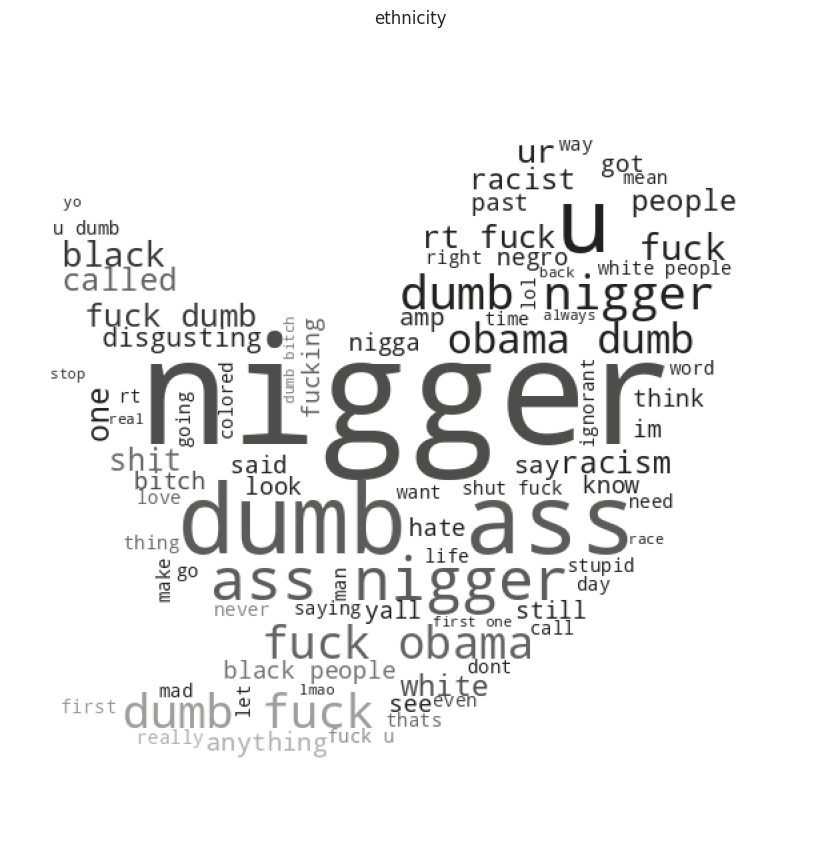

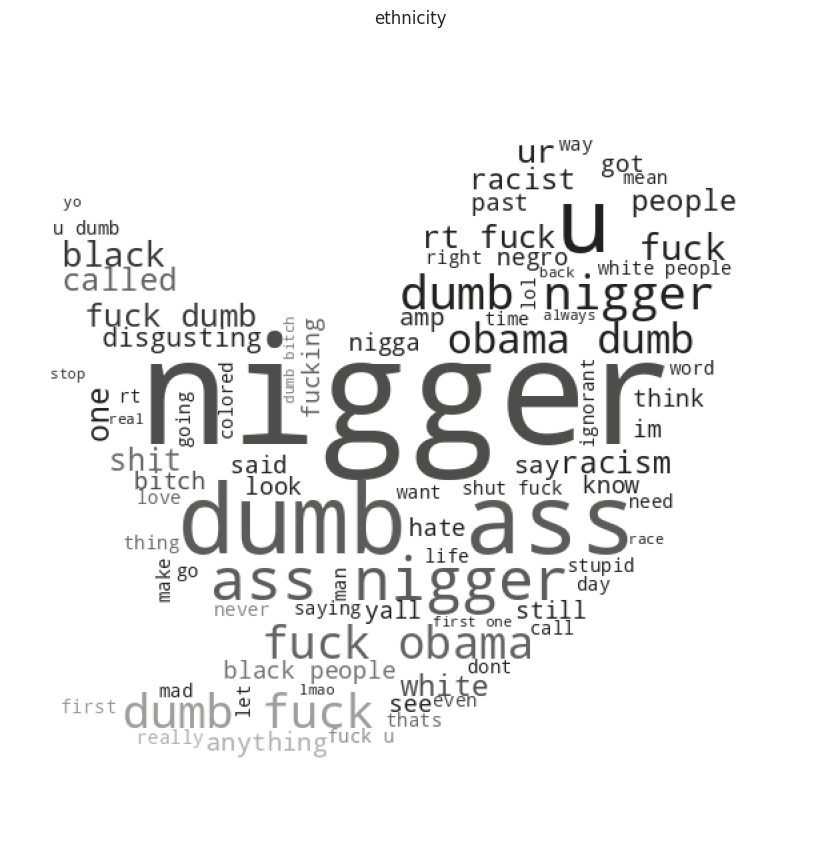

In [ ]:
plot_wordcloud('ethnicity')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44714 entries, 0 to 47691
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               44714 non-null  object
 1   sentiment          44714 non-null  object
 2   no_links_text      44714 non-null  object
 3   sentiment_encoded  44714 non-null  int64 
 4   cleaned_text       44714 non-null  object
 5   tweet_list         44714 non-null  object
 6   text_len           44714 non-null  int64 
 7   Stemming           44714 non-null  object
 8   Lemmatization      44714 non-null  object
 9   Lemma_Stemming     44714 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44714 entries, 0 to 47691
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               44714 non-null  object
 1   sentiment          447

## Tweets without Cyberbullying

In [ ]:
not_cyberbullying = Counter([item for sublist in not_cyberbullying_type['tweet_list'] for item in sublist])
top20_not_cyberbullying = pd.DataFrame(not_cyberbullying.most_common(20))
top20_not_cyberbullying.columns = ['Top Words','Count']
top20_not_cyberbullying.style.background_gradient(cmap='Greens')

Text(0.5, 1.0, 'Top 20 words in Not Cyberbullying')

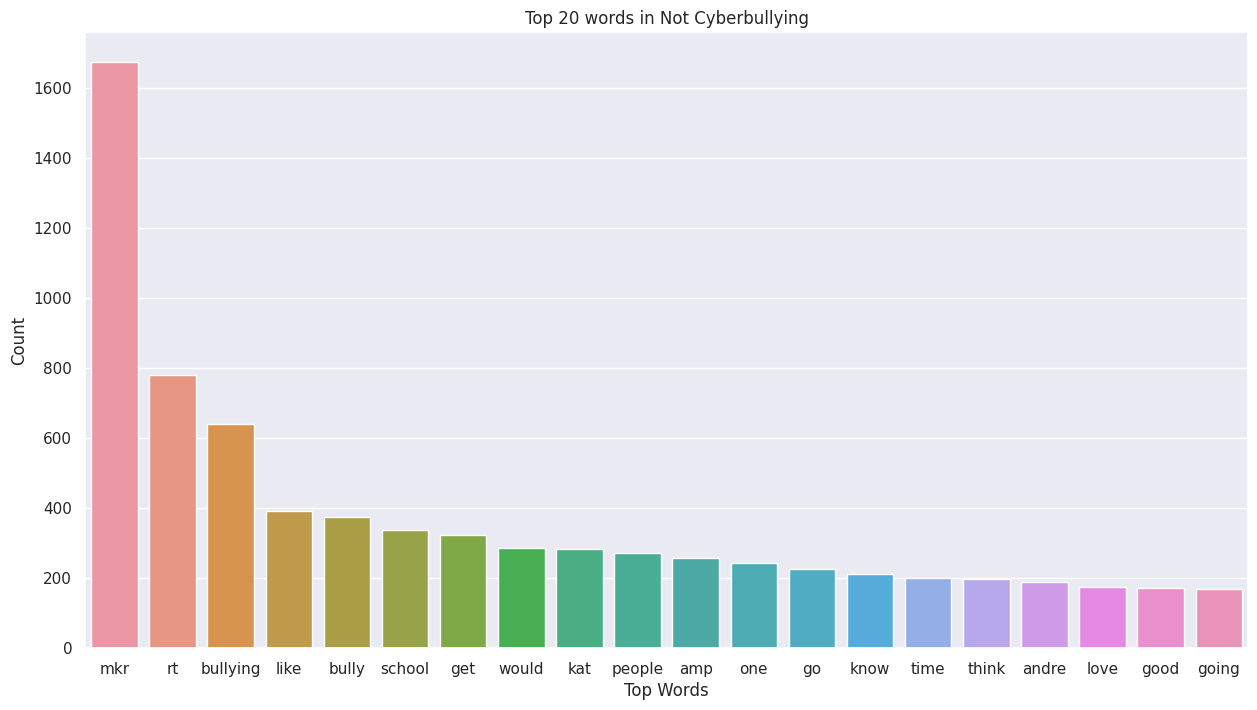

Text(0.5, 1.0, 'Top 20 words in Not Cyberbullying')

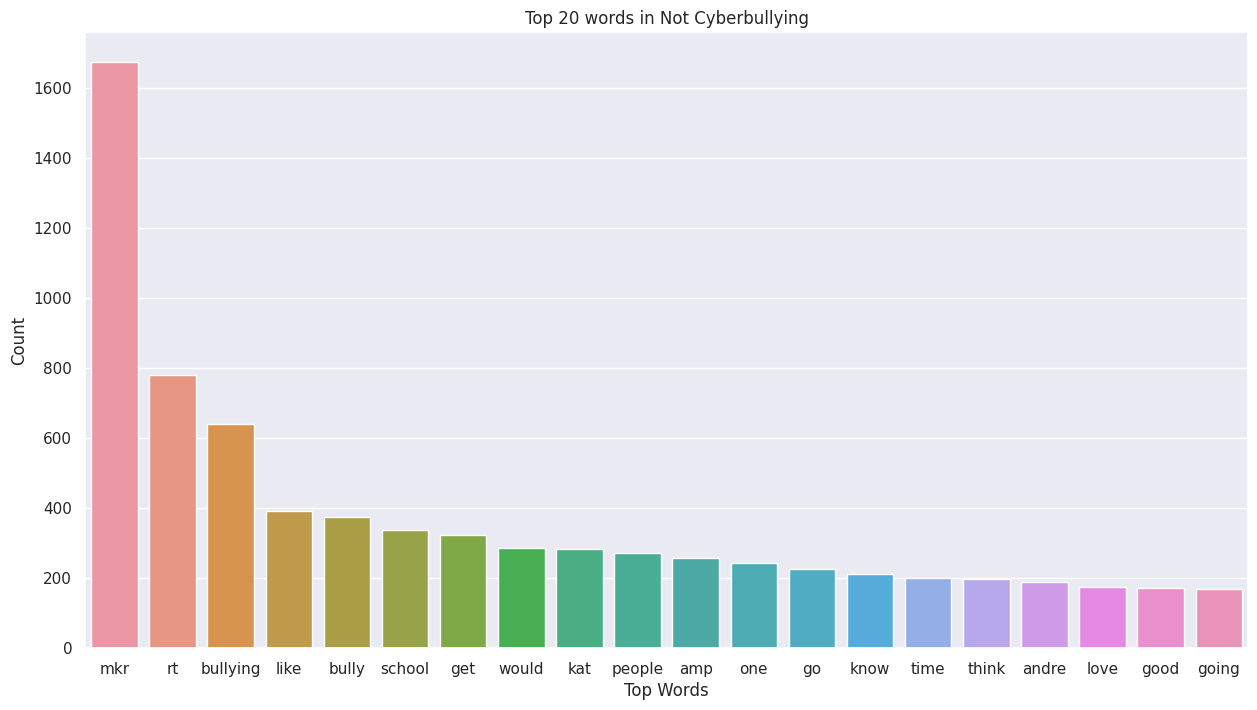

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_not_cyberbullying, y="Count", x="Top Words")
plt.title("Top 20 words in Not Cyberbullying")

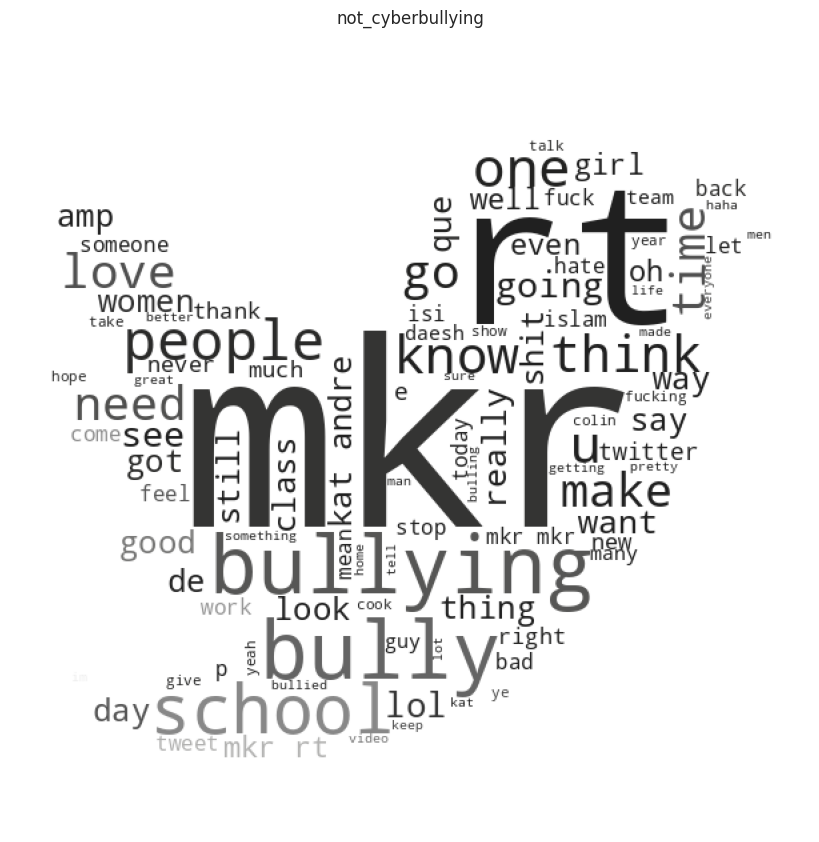

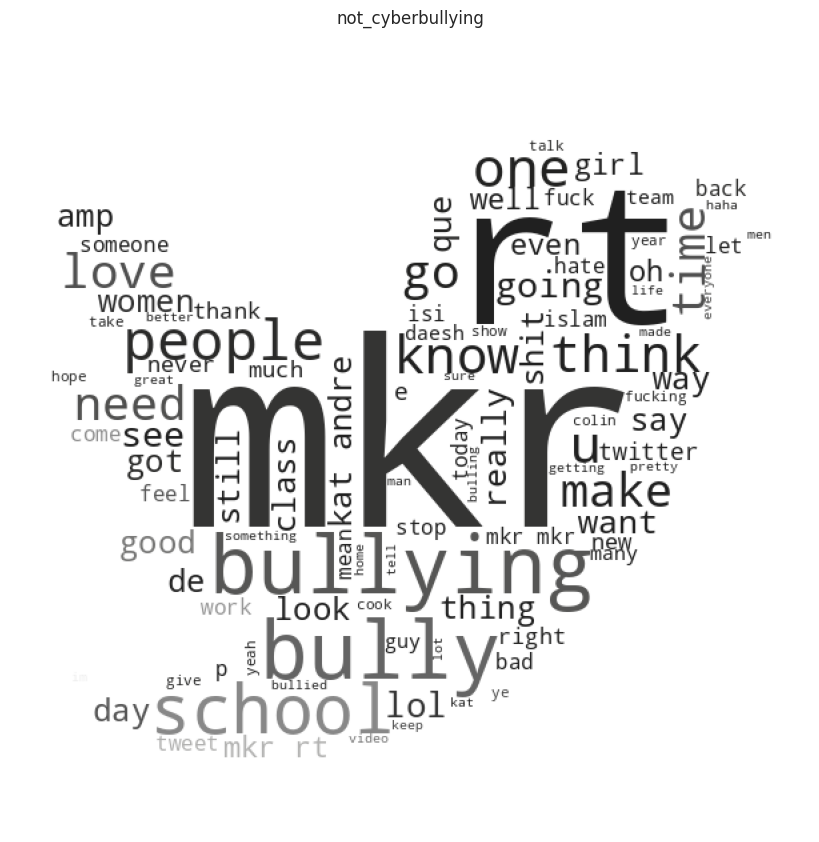

In [ ]:
plot_wordcloud('not_cyberbullying')

In [ ]:
data.head()

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  text_len  \
0      [words, katandandre, food, crapilicious, mkr]         5   
1  [aussietv, white, mkr, theblock, imacelebritya...        11   
2             [classy, whore, red, velvet, cupcakes]         5   
3  [meh, p, thanks, heads, concerned, another, an...         9   
4  [isis, account, pretending, kurdish, account, ...         8   

                                            Stemming  \
0                 word katandandr food crapilici mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                     classi whore red velvet cupcak   
3  meh p thank head concern anoth angri dude twitter   
4  isi account pretend kurdish account like islam...   

                                       Lemmatization  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head concerned another angry dude...   
4  isi account pretending kurdish account like is...   

                                      Lemma_Stemming  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3  meh p thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  text_len  \
0      [words, katandandre, food, crapilicious, mkr]         5   
1  [aussietv, white, mkr, theblock, imacelebritya...        11   
2             [classy, whore, red, velvet, cupcakes]         5   
3  [meh, p, thanks, heads, concerned, another, an...         9   
4  [isis, account, pretending, kurdish, account, ...         8   

                                            Stemming  \
0                 word katandandr food crapilici mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                     classi whore red velvet cupcak   
3  meh p thank head concern anoth angri dude twitter   
4  isi account pretend kurdish account like islam...   

                                       Lemmatization  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head concerned another angry dude...   
4  isi account pretending kurdish account like is...   

                                      Lemma_Stemming  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3  meh p thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...

In [ ]:
sentiments = ["religion", "age", "ethnicity", "gender", "other_cyberbullying","not_cyberbullying"]

In [ ]:
data.drop(columns = ["no_links_text"]).head(10)

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying   
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying   
7  Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying   
8       @stockputout everything but mostly my priest  not_cyberbullying   
9  Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying   

   sentiment_encoded                                       cleaned_text  \
0                  6            words katandandre food crapilicious mkr   
1                  6  aussietv white mkr theblock imacelebrityau tod...   
2                  6                   classy whore red velvet cupcakes   
3                  6  meh p thanks heads concerned another angry dud...   
4                  6  isis account pretending kurdish account like i...   
5                  6  yes test god good bad indifferent weird whatev...   
6                  6  itu sekolah ya bukan tempat bully ga jauh kaya...   
7                  6                karma hope bites kat butt nasty mkr   
8                  6                           everything mostly priest   
9                  6            rebecca black drops school due bullying   

                                          tweet_list  text_len  \
0      [words, katandandre, food, crapilicious, mkr]         5   
1  [aussietv, white, mkr, theblock, imacelebritya...        11   
2             [classy, whore, red, velvet, cupcakes]         5   
3  [meh, p, thanks, heads, concerned, another, an...         9   
4  [isis, account, pretending, kurdish, account, ...         8   
5  [yes, test, god, good, bad, indifferent, weird...        11   
6  [itu, sekolah, ya, bukan, tempat, bully, ga, j...        10   
7        [karma, hope, bites, kat, butt, nasty, mkr]         7   
8                       [everything, mostly, priest]         3   
9     [rebecca, black, drops, school, due, bullying]         6   

                                            Stemming  \
0                 word katandandr food crapilici mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                     classi whore red velvet cupcak   
3  meh p thank head concern anoth angri dude twitter   
4  isi account pretend kurdish account like islam...   
5  ye test god good bad indiffer weird whatev pro...   
6  itu sekolah ya bukan tempat bulli ga jauh kaya...   
7                 karma hope bite kat butt nasti mkr   
8                              everyth mostli priest   
9                rebecca black drop school due bulli   

                                       Lemmatization  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head concerned another angry dude...   
4  isi account pretending kurdish account like is...   
5  yes test god good bad indifferent weird whatev...   
6  itu sekolah ya bukan tempat bully ga jauh kaya...   
7                 karma hope bite kat butt nasty mkr   
8                           everything mostly priest   
9             rebecca black drop school due bullying   

                                      Lemma_Stemming  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3  meh p thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...  
5  ye test god good bad indiffer weird whatev pro...  
6  itu sekolah ya bukan tempat bulli ga jauh kaya.

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying   
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying   
7  Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying   
8       @stockputout everything but mostly my priest  not_cyberbullying   
9  Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying   

   sentiment_encoded                                       cleaned_text  \
0                  6            words katandandre food crapilicious mkr   
1                  6  aussietv white mkr theblock imacelebrityau tod...   
2                  6                   classy whore red velvet cupcakes   
3                  6  meh p thanks heads concerned another angry dud...   
4                  6  isis account pretending kurdish account like i...   
5                  6  yes test god good bad indifferent weird whatev...   
6                  6  itu sekolah ya bukan tempat bully ga jauh kaya...   
7                  6                karma hope bites kat butt nasty mkr   
8                  6                           everything mostly priest   
9                  6            rebecca black drops school due bullying   

                                          tweet_list  text_len  \
0      [words, katandandre, food, crapilicious, mkr]         5   
1  [aussietv, white, mkr, theblock, imacelebritya...        11   
2             [classy, whore, red, velvet, cupcakes]         5   
3  [meh, p, thanks, heads, concerned, another, an...         9   
4  [isis, account, pretending, kurdish, account, ...         8   
5  [yes, test, god, good, bad, indifferent, weird...        11   
6  [itu, sekolah, ya, bukan, tempat, bully, ga, j...        10   
7        [karma, hope, bites, kat, butt, nasty, mkr]         7   
8                       [everything, mostly, priest]         3   
9     [rebecca, black, drops, school, due, bullying]         6   

                                            Stemming  \
0                 word katandandr food crapilici mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                     classi whore red velvet cupcak   
3  meh p thank head concern anoth angri dude twitter   
4  isi account pretend kurdish account like islam...   
5  ye test god good bad indiffer weird whatev pro...   
6  itu sekolah ya bukan tempat bulli ga jauh kaya...   
7                 karma hope bite kat butt nasti mkr   
8                              everyth mostli priest   
9                rebecca black drop school due bulli   

                                       Lemmatization  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head concerned another angry dude...   
4  isi account pretending kurdish account like is...   
5  yes test god good bad indifferent weird whatev...   
6  itu sekolah ya bukan tempat bully ga jauh kaya...   
7                 karma hope bite kat butt nasty mkr   
8                           everything mostly priest   
9             rebecca black drop school due bullying   

                                      Lemma_Stemming  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3  meh p thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...  
5  ye test god good bad indiffer weird whatev pro...  
6  itu sekolah ya bukan tempat bulli ga jauh kaya.

In [ ]:
data.head()

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  text_len  \
0      [words, katandandre, food, crapilicious, mkr]         5   
1  [aussietv, white, mkr, theblock, imacelebritya...        11   
2             [classy, whore, red, velvet, cupcakes]         5   
3  [meh, p, thanks, heads, concerned, another, an...         9   
4  [isis, account, pretending, kurdish, account, ...         8   

                                            Stemming  \
0                 word katandandr food crapilici mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                     classi whore red velvet cupcak   
3  meh p thank head concern anoth angri dude twitter   
4  isi account pretend kurdish account like islam...   

                                       Lemmatization  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head concerned another angry dude...   
4  isi account pretending kurdish account like is...   

                                      Lemma_Stemming  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3  meh p thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                       no_links_text  sentiment_encoded  \
0  In other words #katandandre, your food was cra...                  6   
1  Why is #aussietv so white? #MKR #theblock #ImA...                  6   
2  @XochitlSuckkks a classy whore? Or more red ve...                  6   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                  6   
4  @RudhoeEnglish This is an ISIS account pretend...                  6   

                                        cleaned_text  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                          tweet_list  text_len  \
0      [words, katandandre, food, crapilicious, mkr]         5   
1  [aussietv, white, mkr, theblock, imacelebritya...        11   
2             [classy, whore, red, velvet, cupcakes]         5   
3  [meh, p, thanks, heads, concerned, another, an...         9   
4  [isis, account, pretending, kurdish, account, ...         8   

                                            Stemming  \
0                 word katandandr food crapilici mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                     classi whore red velvet cupcak   
3  meh p thank head concern anoth angri dude twitter   
4  isi account pretend kurdish account like islam...   

                                       Lemmatization  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head concerned another angry dude...   
4  isi account pretending kurdish account like is...   

                                      Lemma_Stemming  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3  meh p thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...

In [ ]:
df = data.copy()

## Modeling

### Train test split on full dataset

In [ ]:
y = data['sentiment']
X = data['cleaned_text']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Count vectorizer

In [ ]:
cv_log = Pipeline([
    ('cv', CountVectorizer(stop_words = 'english', min_df=4)), 
    ('lr', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))
]) 

cv_log.fit(X_train, y_train)
cv_log.score(X_train, y_train), cv_log.score(X_test, y_test)

(0.9386909199343969, 0.8404150639592093)

(0.9386909199343969, 0.8404150639592093)

In [ ]:
cv_mnb = Pipeline([
    ('cv', CountVectorizer(stop_words = 'english', min_df=4)), 
    ('mnb', MultinomialNB())
]) 

cv_mnb.fit(X_train, y_train)
cv_mnb.score(X_train, y_train), cv_mnb.score(X_test, y_test)

(0.8394513195169226, 0.7818230610966992)

(0.8394513195169226, 0.7818230610966992)

### TF - IDF

In [ ]:
tf_log = Pipeline([
    ('tf', TfidfVectorizer(stop_words = 'english', min_df=4)), 
    ('lr', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))
])

tf_log.fit(X_train, y_train)
tf_log.score(X_train, y_train), tf_log.score(X_test, y_test)

(0.9051438795288504, 0.8356740316665175)

(0.9051438795288504, 0.8356740316665175)

In [ ]:
tf_mnb = Pipeline([
    ('tf', TfidfVectorizer(stop_words = 'english', min_df=3)), 
    ('mnb', MultinomialNB())
])
tf_mnb.fit(X_train, y_train)
tf_mnb.score(X_train, y_train), tf_mnb.score(X_test, y_test)

(0.8323840763381541, 0.7604436890598444)

(0.8323840763381541, 0.7604436890598444)

### Cải tiến các models

So sánh các giá trị confusion matrices, accuracy scores

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def matrix_report(pipeline_list, X_test, y_test):
    
    for model in pipeline_list:
        preds = model.predict(X_test)
        print(f'Accuracy = {round(accuracy_score(y_test, preds), 4)}')
        fig, ax = plt.subplots(figsize=(5, 5))
        plot_confusion_matrix(model, X_test, y_test, cmap='Blues', colorbar=True)
        plt.title({model})
        plt.show(); 
        print(classification_report(y_test, preds))
        print()

    return

In [ ]:
#matrix_report (cv_log, X_test, y_test)
#matrix_report(cv_mnb, X_test, y_test)
#matrix_report([cv_log, cv_mnb, tf_log, tf_mnb], X_test, y_test)

### Tổng kết kết quả các model

In [ ]:

def classifier_metrics(report_title, model): 
    '''
    Input a model and calculate predictions with X_test.
    Print a summary of classifier metrics from sklearn.metrics calculated with 
    y_test and preds
    returns df that can be compiled into summary table
    '''
    preds = model.predict(X_test)
    # log_loss_score = log_loss(y_test, preds) 
    # f1 = f1_score(y_test, preds)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, preds)
    # sensitivity = recall_score(y_test, preds)
    # precision = precision_score(y_test, preds)
    metrics = {
        'model': report_title, 
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy, 
        # 'f1_score': f1, 
        # 'log_loss': log_loss_score, 
        # 'sensitivity': sensitivity, 
        # 'precision': precision
    }
    df = pd.DataFrame(metrics.items()).T
    df.columns = df.iloc[0]
    df = df[1:]
    return df
      

In [ ]:
metrics1 = classifier_metrics('CountVectorizer + Multinomial Logistic Regression', cv_log)
metrics2 = classifier_metrics('TF-IDF + Multinomial Logistic Regression', tf_log)
metrics3 = classifier_metrics('CountVectorizer + Multinomial Naive Bayes', cv_mnb)
metrics4 = classifier_metrics('TF-IDF + Multinomial Naive Bayes', tf_mnb)

metrics = pd.concat([metrics1, metrics2, metrics3, metrics4]).sort_values('test_accuracy')
metrics 

0                                              model train_accuracy  \
1                   TF-IDF + Multinomial Naive Bayes       0.832384   
1          CountVectorizer + Multinomial Naive Bayes       0.839451   
1           TF-IDF + Multinomial Logistic Regression       0.905144   
1  CountVectorizer + Multinomial Logistic Regression       0.938691   

0 test_accuracy  
1      0.760444  
1      0.781823  
1      0.835674  
1      0.840415

0                                              model train_accuracy  \
1                   TF-IDF + Multinomial Naive Bayes       0.832384   
1          CountVectorizer + Multinomial Naive Bayes       0.839451   
1           TF-IDF + Multinomial Logistic Regression       0.905144   
1  CountVectorizer + Multinomial Logistic Regression       0.938691   

0 test_accuracy  
1      0.760444  
1      0.781823  
1      0.835674  
1      0.840415

In [ ]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the TITLE 
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

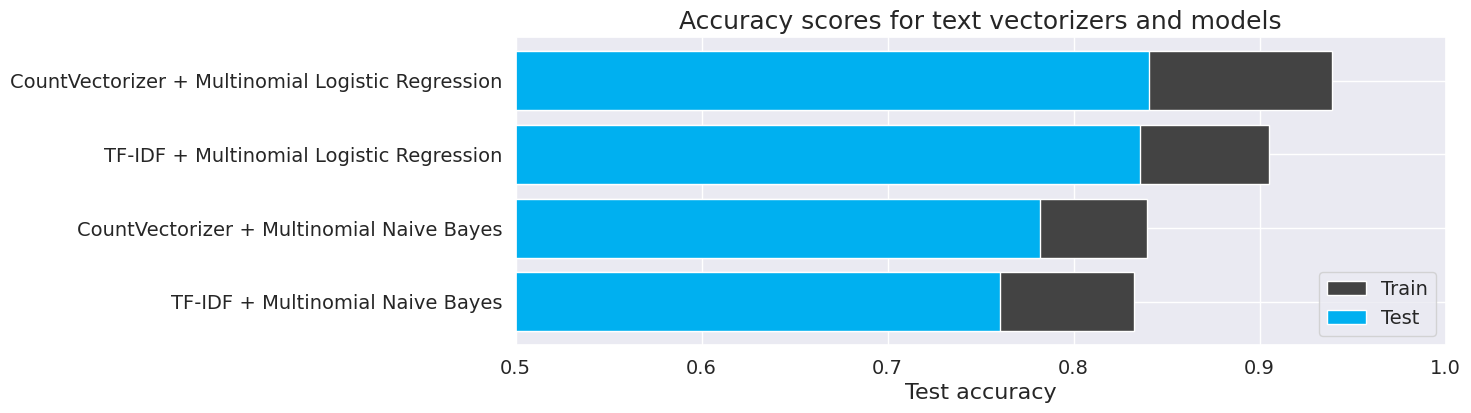

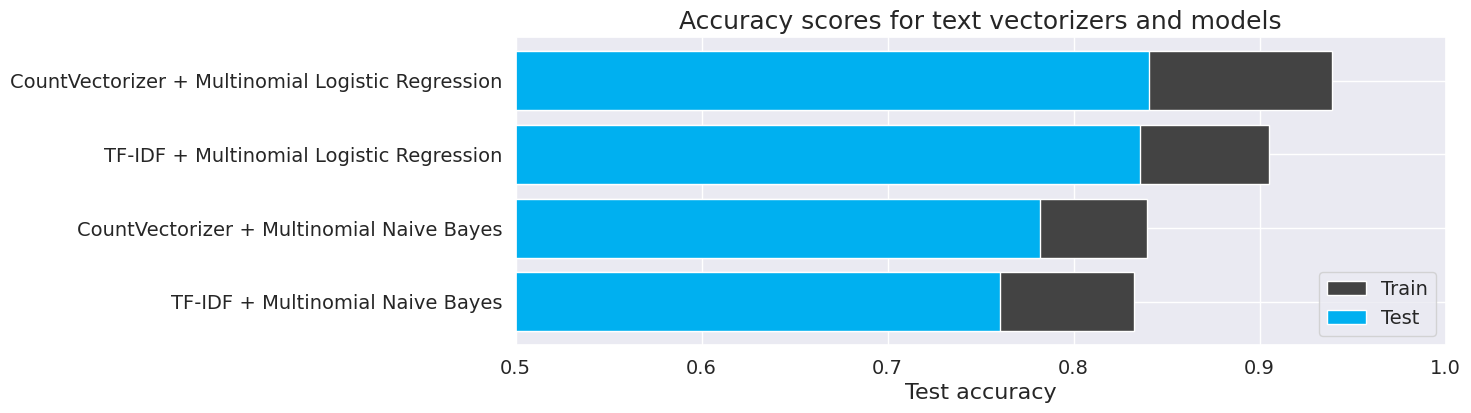

In [ ]:

plt.figure(figsize=(12, 4))
plt.xlim(.5, 1)
plt.barh(metrics['model'], metrics['train_accuracy'], label='Train', color='#434343ff')
plt.barh(metrics['model'], metrics['test_accuracy'], label='Test', color='#00b0f0ff')
plt.xlabel('Test accuracy')
plt.title('Accuracy scores for text vectorizers and models')
plt.legend()

#Model LSTM B

In [ ]:
data = data[data["sentiment"]!="other_cyberbullying"]

In [ ]:
data['sentiment'] = data['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

## Data preprocessing for LSTM

In [ ]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
          new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [ ]:
vocabulary, tokenized_column = Tokenize(data["cleaned_text"], max_length)

In [ ]:
# Tìm số từ vựng và độ dài của các đoạn văn trong tập dữ liệu
jml_vocab = len(vocabulary) + 1

In [ ]:
data["cleaned_text"].iloc[10]

'bully flushes kd'

'bully flushes kd'

In [ ]:
tokenized_column[10]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

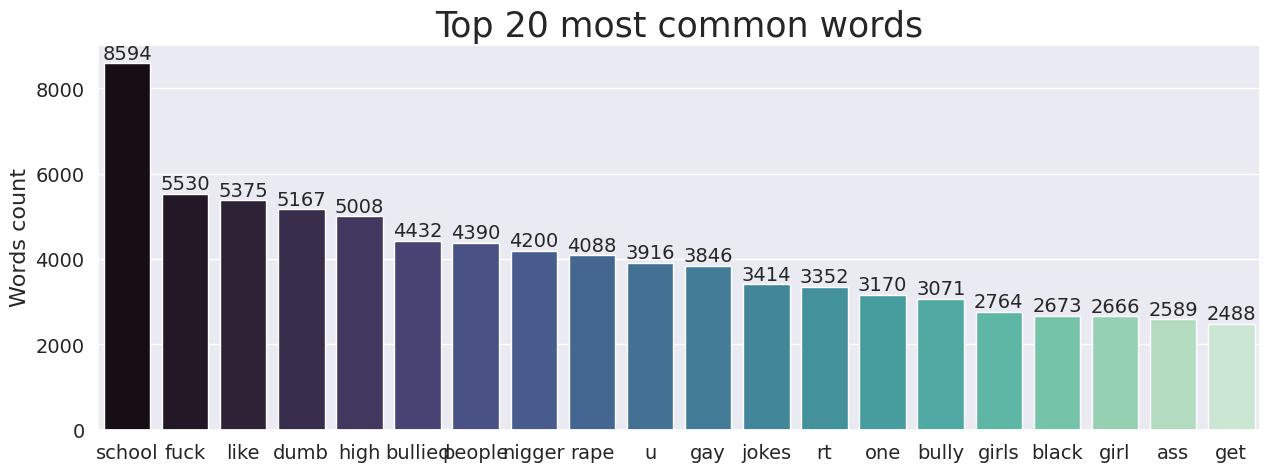

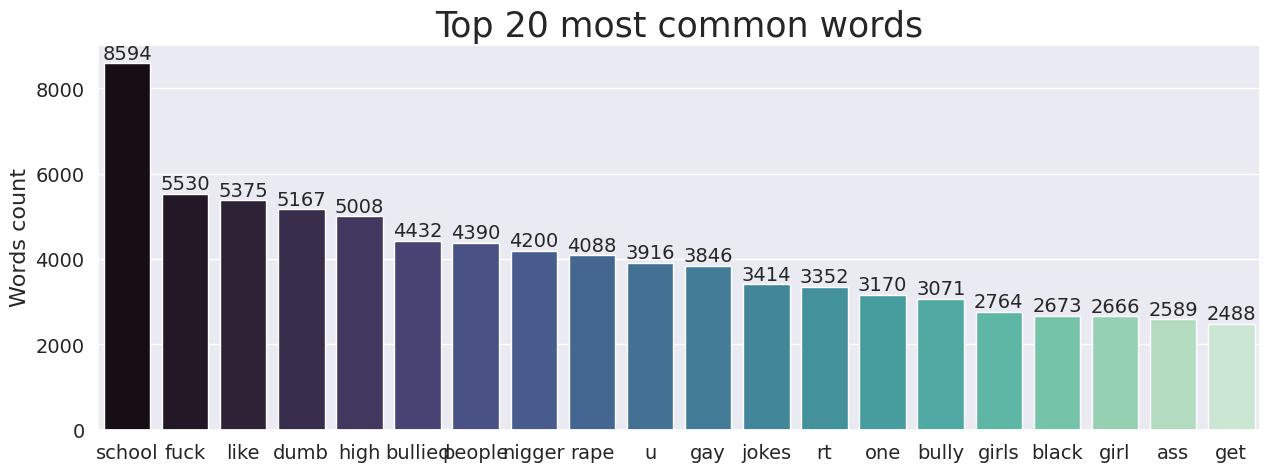

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x =keys, y = values, palette='mako')
plt.title('Top 20 most common words', size=25)
ax.bar_label(ax.containers[0])
plt.ylabel("Words count")
plt.show()

## Word Embedding by Word2Vec

In [ ]:
#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

In [ ]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
EMBEDDING_DIM = 200

In [ ]:
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)

In [ ]:
#define empty embedding matrix
embedding_matrix = np.zeros((jml_vocab, EMBEDDING_DIM))
    
#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary:
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)
print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (44513, 200)
Embedding Matrix Shape: (44513, 200)


## Train - Validation - Test split

In [ ]:
X = tokenized_column
y = data['sentiment'].values

In [ ]:
#Seed for reproducibility
import random
seed_value=42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed_value)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5727],
       [   1, 5686],
       [   2, 5600],
       [   3, 5492],
       [   4, 5512]])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train),np.array(y_train));

In [ ]:
(unique, counts) = np.unique(y_train_os, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5727],
       [   1, 5727],
       [   2, 5727],
       [   3, 5727],
       [   4, 5727]])

## PyTorch datasets and dataloeders

In [ ]:
train_data = TensorDataset(torch.from_numpy(X_train_os), torch.from_numpy(y_train_os))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True) 
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)

## PyTorch LSTM modeling

In [ ]:
import torch 
import torch.nn as nn
NUM_CLASSES = 5 #We are dealing with a multiclass classification of 5 classes
HIDDEN_DIM = 100 #number of neurons of the internal state (internal neural network in the LSTM)
LSTM_LAYERS = 1 #Number of stacked LSTM layers

LR = 3e-4 #Learning rate
DROPOUT = 0.5 #LSTM Dropout
BIDIRECTIONAL = True #Boolean value to choose if to use a bidirectional LSTM or not
EPOCHS = 5 #Number of training epoch
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


In [ ]:
class BiLSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, jml_vocab, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional, batch_size, dropout):
        super(BiLSTM_Sentiment_Classifier, self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        self.embedding = nn.Embedding(jml_vocab, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim * self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:, -1, :]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)
        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers * self.num_directions, batch_size, self.hidden_dim)).to(DEVICE)
        c0 = torch.zeros((self.lstm_layers * self.num_directions, batch_size, self.hidden_dim)).to(DEVICE)
        hidden = (h0, c0)
        return hidden

In [ ]:
model = BiLSTM_Sentiment_Classifier(jml_vocab, EMBEDDING_DIM, HIDDEN_DIM, NUM_CLASSES, LSTM_LAYERS, BIDIRECTIONAL, BATCH_SIZE, DROPOUT)
model = model.to(DEVICE)

#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)

BiLSTM_Sentiment_Classifier(
  (embedding): Embedding(44513, 200)
  (lstm): LSTM(200, 100, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=200, out_features=5, bias=True)
  (softmax): LogSoftmax(dim=1)
)
BiLSTM_Sentiment_Classifier(
  (embedding): Embedding(44513, 200)
  (lstm): LSTM(200, 100, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=200, out_features=5, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = 5e-6)

## LSTM Training loop

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0
    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device

        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())
            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
      print('Early stopped at epoch :', e+1)
      break
       
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 91.269330).  Saving model ...
	Train_loss : 0.6978 Val_loss : 0.2652
	Train_acc : 73.465% Val_acc : 91.269%
Epoch 2:Validation accuracy increased (91.269330 --> 91.945876).  Saving model ...
	Train_loss : 0.1901 Val_loss : 0.2358
	Train_acc : 93.649% Val_acc : 91.946%
Epoch 3:Validation accuracy increased (91.945876 --> 92.074742).  Saving model ...
	Train_loss : 0.1168 Val_loss : 0.2328
	Train_acc : 96.109% Val_acc : 92.075%
Epoch 4:Validation accuracy increased (92.074742 --> 92.332474).  Saving model ...
	Train_loss : 0.0740 Val_loss : 0.2414
	Train_acc : 97.634% Val_acc : 92.332%
Epoch 5:Validation accuracy did not increase
	Train_loss : 0.0476 Val_loss : 0.2865
	Train_acc : 98.546% Val_acc : 91.559%


In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

## LSTM TESTING

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [ ]:
print('Classification Report for Bi-LSTM :\n', classification_report(y_test_list, y_pred_list, labels=[0, 1, 2, 3, 4])) # Specify the labels parameter to match the number of classes in your target variable


Classification Report for Bi-LSTM :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1590
           1       0.97      0.98      0.97      1578
           2       0.98      0.98      0.98      1552
           3       0.91      0.88      0.90      1525
           4       0.83      0.86      0.84      1531

    accuracy                           0.93      7776
   macro avg       0.93      0.93      0.93      7776
weighted avg       0.93      0.93      0.93      7776



In [ ]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

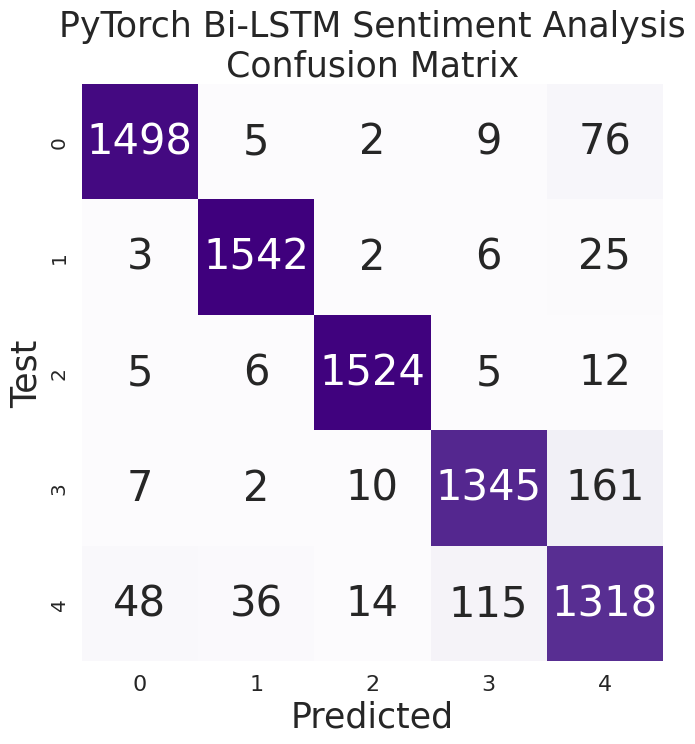

In [ ]:
conf_matrix(y_test_list, y_pred_list, 'PyTorch Bi-LSTM Sentiment Analysis\nConfusion Matrix', labels=[0, 1, 2, 3, 4])

In [ ]:
lemmatizer = WordNetLemmatizer()
def teks_proses(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\n"," ",teks) #Menghilangkan \n
  teks = teks.strip()
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  teks = re.sub("rt"," ",teks) #Menghilangkan RT
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stop_words])
  teks =  lemmatizer.lemmatize(teks)
  teks = re.sub(r"can\'t", "can not", teks)
  teks = re.sub(r"n\'t", " not", teks)
  teks = re.sub(r"\'re", " are", teks)
  teks = re.sub(r"\'s", " is", teks)
  teks = re.sub(r"\'d", " would", teks)
  teks = re.sub(r"\'ll", " will", teks)
  teks = re.sub(r"\'t", " not", teks)
  teks = re.sub(r"\'ve", " have", teks)
  teks = re.sub(r"\'m", " am", teks)
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', teks)
  return teks

In [ ]:
sentence = "But it’s ok for a female reporter to call Kayleigh a bitch on national television."

In [ ]:
teks_proses(sentence)

'ok female repo er call kayleigh bitch national television'

In [ ]:
# Tokenize the input sentence
tokens = sentence.split()
word2idx = {word: i for i, word in enumerate(vocabulary)}
word2idx['<unk>'] = len(vocabulary) 
token_ids = [word2idx.get(word, word2idx['<unk>']) for word in tokens]
sentence_array = np.array(token_ids)

# Prepare input
input_sentence = torch.from_numpy(sentence_array).unsqueeze(0).to(DEVICE) # add batch_size of 1
batch_size = input_sentence.shape[0]
hidden = model.init_hidden(batch_size)
output, _= model.forward(input_sentence, hidden)  # extract output from tuple
pred = np.argmax(output.detach().numpy(), axis=1) + 1

In [ ]:
output

tensor([[-2.5296, -2.4528, -0.8096, -1.7353, -1.5471]],
       grad_fn=<LogSoftmaxBackward0>)

In [ ]:
pred

array([3])

Đây là dạng Gender Cyberbullying